# BDM 2053-Big Data Algorithms and Statistics
## Final Project


## Submitted By: Vengie Candar Dinampo (c0849806)

# Overview

This a final project of Term2-BDM 2053-Big Data Algorithms and Statistics. It’s all about vehicle insurance claim. In this business problem, I will be working with vehicle insurance claim data to demonstrate how to create a predictive model that predicts if a vehicle insurance claim is fraudulent or not. This will be a classification problem. With prediction data, to classify if the claim occurred or not

This is to illustrate the building of a Machine Learning Pipeline:

- Data preparation and cleaning
- Exploratory Data Analysis
- Cross Validation
- Feature Engineering
- Building Model
- Model Selection
- Fitting the Model
- Model Optimision
- Predicting the test Data



# Introducing the business scenario
The vehicle insurance policy dataset is originially retrieved from the SAS Enterprise Miner database. The included dataset is generated by re-organization and transformation as described in Qian et al. (2016).

This vehicle insurance dataset includes data on insured vehicles for a full year. The amount of claims made for that vehicle during that year is reflected in the response variable.

The project involve use of dataset with 10302 data and 27 features . In this use case, it is a classification problem. The targets for prediction - is a binary value on whether a claim has occured or not.



# Problem Statement
A classification problem of whether or not a vehicle insurance claim occured, from start to finish. Thus, by classifying whether or not a claim occured. Performing a simple hold-out validation as a test set. In the spirit of never having seen this artificially created test set.

# About this dataset

The Dataset contains information on policyholders having the attributes like policy tenure, age of the car, age of the car owner, the population density of the city, make and model of the car, power, engine type, etc, and the target variable indicating whether the policyholder files a claim in the next 6 months or not.

# Attribute information
Undrestanding the fields mean and how they might affect our target variables in theory. Based on our logical understanding of insurance, this is just wild speculation at this point. 

Field Name          Description
1. ID: Identification
2. KIDSDRIV: Number of driving children 
3. BIRTH: Date of driver’s birth
4. AGE: Age of driver
5. HOMEKIDS: Number of children at home
6. YOJ: Years on Job
7. INCOME: Income
8. PARENT1: Single parent
9. HOME_VAL: Home value
10. MSTATUS: Marital status
11. GENDER: Gender
12. EDUCATION: Highest level of education
13. OCCUPATION:  Seniority at work
14. TRAVTIME: Distance to work
15. CAR_USE: Purpose of vehicle
16. BLUEBOOK: Value of vehicle
17. TIF: Time In-force
18. CAR_TYPE: Type of vehicle
19. RED_CAR: Whether or not vehicle is red in colour
20. OLDCLAIM: Total claims in the past 5 years
21. CLM_FREQ: Claim frequency in past 5 years
22. REVOKED: License revoked in the past 7 years
23. MVR_PTS: Motor Vehicle record points
24. CLM_AMT: Claim Amount
25. CAR_AGE: Age of car
26. CLAIM_FLAG: Claim or no claim
27. URBANICITY: Urban or rural


<img style="float: left;" src="VEH claim inusrance dataset attribute.jpg">


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from hyperopt.pyll.base import scope


# 1. Data Preprocessing: Data cleaning
## 1.1 Understanding the data and it's dimension
### Data Loading
loading the data and working with the data description.

In [2]:
vehicle_insurance_data = 'vehicle_insurance_claim.csv'
df = pd.read_csv(vehicle_insurance_data)
pd.set_option('display.max_columns', None)
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [3]:
df.shape

(10302, 27)

Note: Checking the data shape, data has 10302 rows and 27 columns.

In [4]:
df.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

Note: Showing the 27 column names

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [6]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Total Missing Values: {df.isna().sum().sum()}")
print(f"Number of rows with missing values: {df.isna().any(axis=1).sum()}")

Dataset has 10302 rows and 27 columns
Duplicates: 1
Total Missing Values: 3004
Number of rows with missing values: 2645


Note: As observe in the data info that there are null records in the dataset. 
Next step, is to explore the missing values

In [7]:
#Checking the values of the categorical obeject
df.PARENT1.value_counts()

No     8959
Yes    1343
Name: PARENT1, dtype: int64

In [8]:
df.GENDER.value_counts()

z_F    5545
M      4757
Name: GENDER, dtype: int64

In [9]:
df.EDUCATION.value_counts()

z_High School    2952
Bachelors        2823
Masters          2078
<High School     1515
PhD               934
Name: EDUCATION, dtype: int64

In [10]:
df.OCCUPATION.value_counts()

z_Blue Collar    2288
Clerical         1590
Professional     1408
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
Doctor            321
Name: OCCUPATION, dtype: int64

In [11]:
df.CAR_USE.value_counts()

Private       6513
Commercial    3789
Name: CAR_USE, dtype: int64

In [12]:
df.CAR_TYPE.value_counts()

z_SUV          2883
Minivan        2694
Pickup         1772
Sports Car     1179
Van             921
Panel Truck     853
Name: CAR_TYPE, dtype: int64

In [13]:
df.RED_CAR.value_counts()

no     7326
yes    2976
Name: RED_CAR, dtype: int64

In [14]:
df.REVOKED.value_counts()

No     9041
Yes    1261
Name: REVOKED, dtype: int64

In [15]:
df.URBANICITY.value_counts()

Highly Urban/ Urban      8230
z_Highly Rural/ Rural    2072
Name: URBANICITY, dtype: int64

Note: As observed, there are some values that have prefix 'z' that does mean anyhing. As seen in GENDER,EDUCATION, OCCUPATION,CAR_TYPE and URBANICITY. Next is to clean as his data.

## 1.2 Data Preprocessing
### Performing Clean Up of Data
data processing of cleaning up of data to remove duplicates and remove columns that don't add any value.

In [16]:
# Removing the duplicate in the dataframe
df.drop_duplicates(inplace=True) 

In [17]:
# Convert currecy into floats
from re import sub
from decimal import Decimal

#Function to convert the data type to numerical type
def convert_currency(df, columns: list):
    for col in columns:
        df[col] = np.where(pd.isnull(df[col]), df[col], df[col]
                           .astype('str')
                           .map(lambda x: x.replace(',','').replace('$',''))).astype('float')
        
currency_cols = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
convert_currency(df, currency_cols)
df

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,67349.0,No,0.0,z_No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,91449.0,No,257252.0,z_No,M,z_High School,z_Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,52881.0,No,0.0,z_No,M,Bachelors,Manager,26,Private,21970.0,1,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,16039.0,No,124191.0,Yes,z_F,z_High School,Clerical,5,Private,4010.0,4,z_SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,z_Blue Collar,32,Private,15440.0,7,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13AUG54,45.0,2,9.0,164669.0,No,386273.0,Yes,M,PhD,Manager,21,Private,13270.0,15,Minivan,no,0.0,0,No,2,0.0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,107204.0,No,332591.0,Yes,M,Masters,NaN,36,Commercial,24490.0,6,Panel Truck,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,39837.0,No,170611.0,Yes,z_F,<High School,z_Blue Collar,12,Private,13820.0,7,z_SUV,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,43445.0,No,149248.0,Yes,z_F,Bachelors,Home Maker,36,Private,22550.0,6,Minivan,no,0.0,0,No,0,0.0,11.0,0,Highly Urban/ Urban


Note: As the result above, the '$' sign has been removed in 'INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT' columns. Next is to cleanup the prefix 'z' in MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_TYPE','URBANICITY' column.

In [18]:
# There are some values that have a prefix 'z_' that does not mean anything. 
def remove_z(df, columns: list):
    for col in columns:
        df[col] = np.where(pd.isnull(df[col]), df[col], df[col].astype('str').map(lambda x: x.replace('z_','')))
        
        
z_cols = ['MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_TYPE','URBANICITY'] 
remove_z(df, z_cols)

In [19]:
# Renaming  target columns with a prefix 'TGT_' to have better visualization on the target variable
df.rename({'CLM_AMT': 'TGT_CLAIM_AMT', 'CLAIM_FLAG': 'TGT_CLAIM_FLAG'}, axis=1, inplace=True);

In [20]:
# Remove columns don't add any value. 'BIRTH' is redundant with the 'AGE' column present
df.drop(['BIRTH','ID'], axis=1, inplace=True);
df.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,TGT_CLAIM_AMT,CAR_AGE,TGT_CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,Manager,26,Private,21970.0,1,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,Clerical,5,Private,4010.0,4,SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,Blue Collar,32,Private,15440.0,7,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   KIDSDRIV        10301 non-null  int64  
 1   AGE             10294 non-null  float64
 2   HOMEKIDS        10301 non-null  int64  
 3   YOJ             9753 non-null   float64
 4   INCOME          9731 non-null   float64
 5   PARENT1         10301 non-null  object 
 6   HOME_VAL        9726 non-null   float64
 7   MSTATUS         10301 non-null  object 
 8   GENDER          10301 non-null  object 
 9   EDUCATION       10301 non-null  object 
 10  OCCUPATION      9636 non-null   object 
 11  TRAVTIME        10301 non-null  int64  
 12  CAR_USE         10301 non-null  object 
 13  BLUEBOOK        10301 non-null  float64
 14  TIF             10301 non-null  int64  
 15  CAR_TYPE        10301 non-null  object 
 16  RED_CAR         10301 non-null  object 
 17  OLDCLAIM        10301 non-null 

In [22]:
df.nunique()

KIDSDRIV             5
AGE                 61
HOMEKIDS             6
YOJ                 21
INCOME            8151
PARENT1              2
HOME_VAL          6334
MSTATUS              2
GENDER               2
EDUCATION            5
OCCUPATION           8
TRAVTIME           100
CAR_USE              2
BLUEBOOK          2985
TIF                 23
CAR_TYPE             6
RED_CAR              2
OLDCLAIM          3545
CLM_FREQ             6
REVOKED              2
MVR_PTS             14
TGT_CLAIM_AMT     2346
CAR_AGE             30
TGT_CLAIM_FLAG       2
URBANICITY           2
dtype: int64

In [23]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Total Missing Values: {df.isna().sum().sum()}")
print(f"Number of rows with missing values: {df.isna().any(axis=1).sum()}")

Dataset has 10301 rows and 25 columns
Duplicates: 0
Total Missing Values: 3004
Number of rows with missing values: 2645


Note: In the above result, Duplicate has been removed and columns that dont add any value has been removedas well. Howevr, there are rows with missing values.

In [24]:
# Define the categorical columns and numerical columns which will be later used as features
categorical_cols = [col for col in df.columns if (df[col].nunique() < 10) and 
                    (df[col].dtype == "object") and
                    col not in ['TGT_CLAIM_AMT','TGT_CLAIM_FLAG']]

numerical_cols = [col for col in df.columns if (df[col].dtype in ['int64', 'float64']) and
                  col not in ['TGT_CLAIM_AMT','TGT_CLAIM_FLAG']]

print('Number of Numerical columns   :',len(numerical_cols))
print('Number of Categorical columns :',len(categorical_cols))

Number of Numerical columns   : 13
Number of Categorical columns : 10


## 1.3 Data Visualization

<AxesSubplot:xlabel='EDUCATION', ylabel='INCOME'>

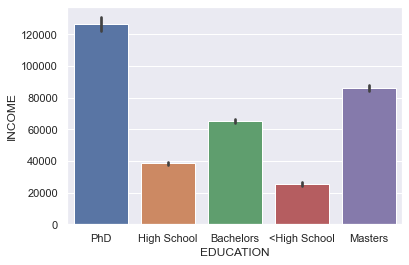

In [25]:
sns.set_theme()
sns.barplot(data = df,x = 'EDUCATION', y = 'INCOME', label = 'CLAIM_FLAG')

<AxesSubplot:xlabel='OCCUPATION', ylabel='INCOME'>

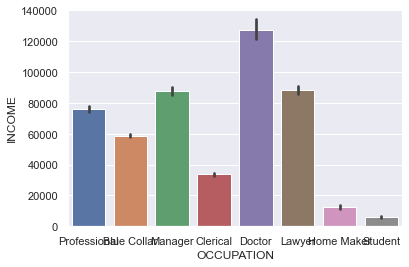

In [26]:
sns.set_theme()
sns.barplot(data = df,x = 'OCCUPATION', y = 'INCOME', label = 'CLAIM_FLAG')

<AxesSubplot:xlabel='GENDER', ylabel='count'>

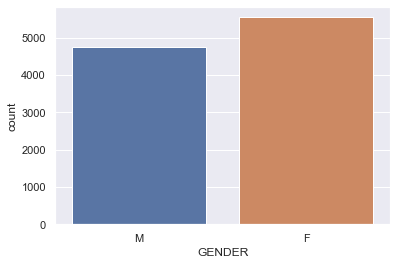

In [27]:
sns.set_theme()
sns.countplot(data = df, x = 'GENDER')

<AxesSubplot:xlabel='CAR_USE', ylabel='count'>

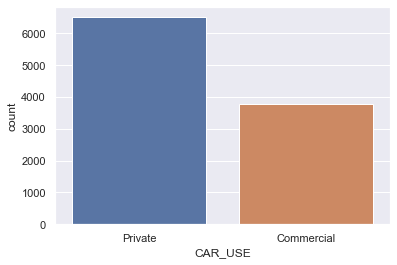

In [28]:
sns.set_theme()
sns.countplot(data = df, x = 'CAR_USE')

<AxesSubplot:xlabel='INCOME', ylabel='Count'>

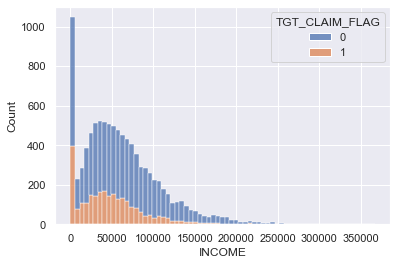

In [29]:
sns.set_theme()
sns.histplot(df, x = 'INCOME', hue = 'TGT_CLAIM_FLAG', multiple = 'stack')

<AxesSubplot:xlabel='AGE', ylabel='Count'>

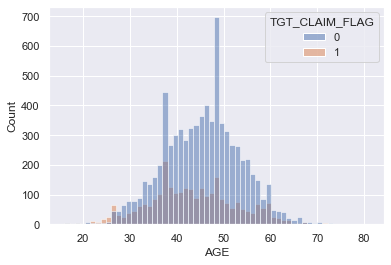

In [30]:
sns.set_theme()
sns.histplot(data = df, x = 'AGE', hue = 'TGT_CLAIM_FLAG')

<AxesSubplot:xlabel='TGT_CLAIM_FLAG', ylabel='TGT_CLAIM_AMT'>

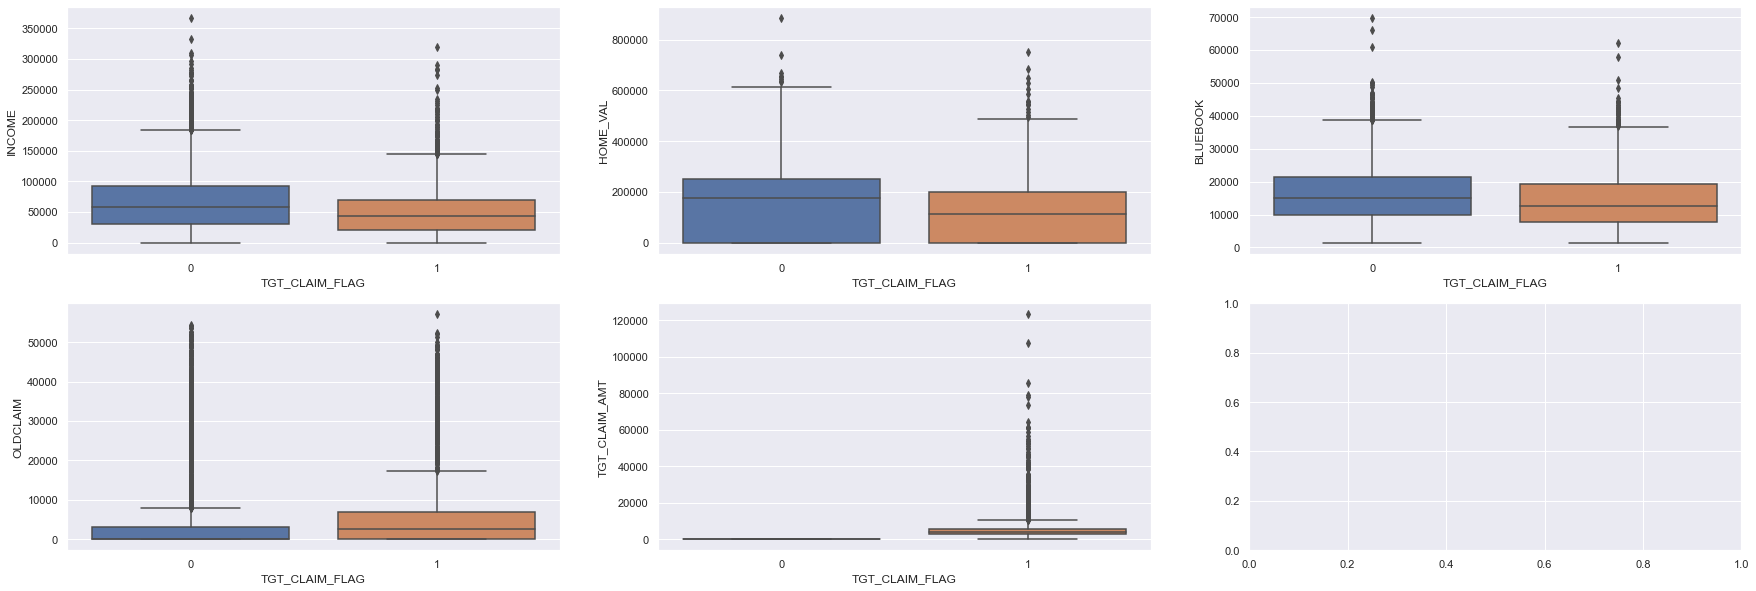

In [31]:
sns.set_theme()
figure, axis = plt.subplots(2,3, figsize = (30,10))
sns.boxplot(y = 'INCOME', x = 'TGT_CLAIM_FLAG', data = df, ax = axis[0,0])
sns.boxplot(y = 'HOME_VAL', x = 'TGT_CLAIM_FLAG', data = df, ax = axis[0,1])
sns.boxplot(y = 'BLUEBOOK', x = 'TGT_CLAIM_FLAG', data = df, ax = axis[0,2])
sns.boxplot(y = 'OLDCLAIM', x = 'TGT_CLAIM_FLAG', data = df, ax = axis[1,0])
sns.boxplot(y = 'TGT_CLAIM_AMT', x = 'TGT_CLAIM_FLAG', data = df, ax = axis[1,1])

Note: As observed in the boxplot figure, its shows the outliers. Next step, is I gonna remove the outlier.

## 1.4 Removing Outlier

In [32]:
def IQR(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)

  IQR = Q3 - Q1
  LR = Q1 - (IQR * 1.5)
  UR = Q3 + (IQR * 1.5)

  return LR, UR

In [33]:
class_one = df[df['TGT_CLAIM_FLAG'] == 1]
class_zero = df[df['TGT_CLAIM_FLAG'] == 0]

In [34]:
LR1, UR1 = IQR(class_one.INCOME)
LR0, UR0 = IQR(class_zero.INCOME)
class_one = class_one[(class_one['INCOME'] > LR1) & (class_one['INCOME'] < UR1)]
class_zero = class_zero[(class_zero['INCOME'] > LR0) & (class_zero['INCOME'] < UR0)]

In [35]:
LR1, UR1 = IQR(class_one.HOME_VAL)
LR0, UR0 = IQR(class_zero.HOME_VAL)
class_one = class_one[(class_one['HOME_VAL'] > LR1) & (class_one['HOME_VAL'] < UR1)]
class_zero = class_zero[(class_zero['HOME_VAL'] > LR0) & (class_zero['HOME_VAL'] < UR0)]

In [36]:
LR1, UR1 = IQR(class_one.BLUEBOOK)
LR0, UR0 = IQR(class_zero.BLUEBOOK)
class_one = class_one[(class_one['BLUEBOOK'] > LR1) & (class_one['BLUEBOOK'] < UR1)]
class_zero = class_zero[(class_zero['BLUEBOOK'] > LR0) & (class_zero['BLUEBOOK'] < UR0)]

In [37]:
LR1, UR1 = IQR(class_one.OLDCLAIM)
LR0, UR0 = IQR(class_zero.OLDCLAIM)
class_one = class_one[(class_one['OLDCLAIM'] > LR1) & (class_one['OLDCLAIM'] < UR1)]
class_zero = class_zero[(class_zero['OLDCLAIM'] > LR0) & (class_zero['OLDCLAIM'] < UR0)]

In [38]:
LR1, UR1 = IQR(class_one.TGT_CLAIM_AMT)
class_one = class_one[(class_one['TGT_CLAIM_AMT'] > LR1) & (class_one['TGT_CLAIM_AMT'] < UR1)]

In [39]:
df = pd.concat([class_one, class_zero], axis = 0)

<AxesSubplot:xlabel='TGT_CLAIM_FLAG', ylabel='TGT_CLAIM_AMT'>

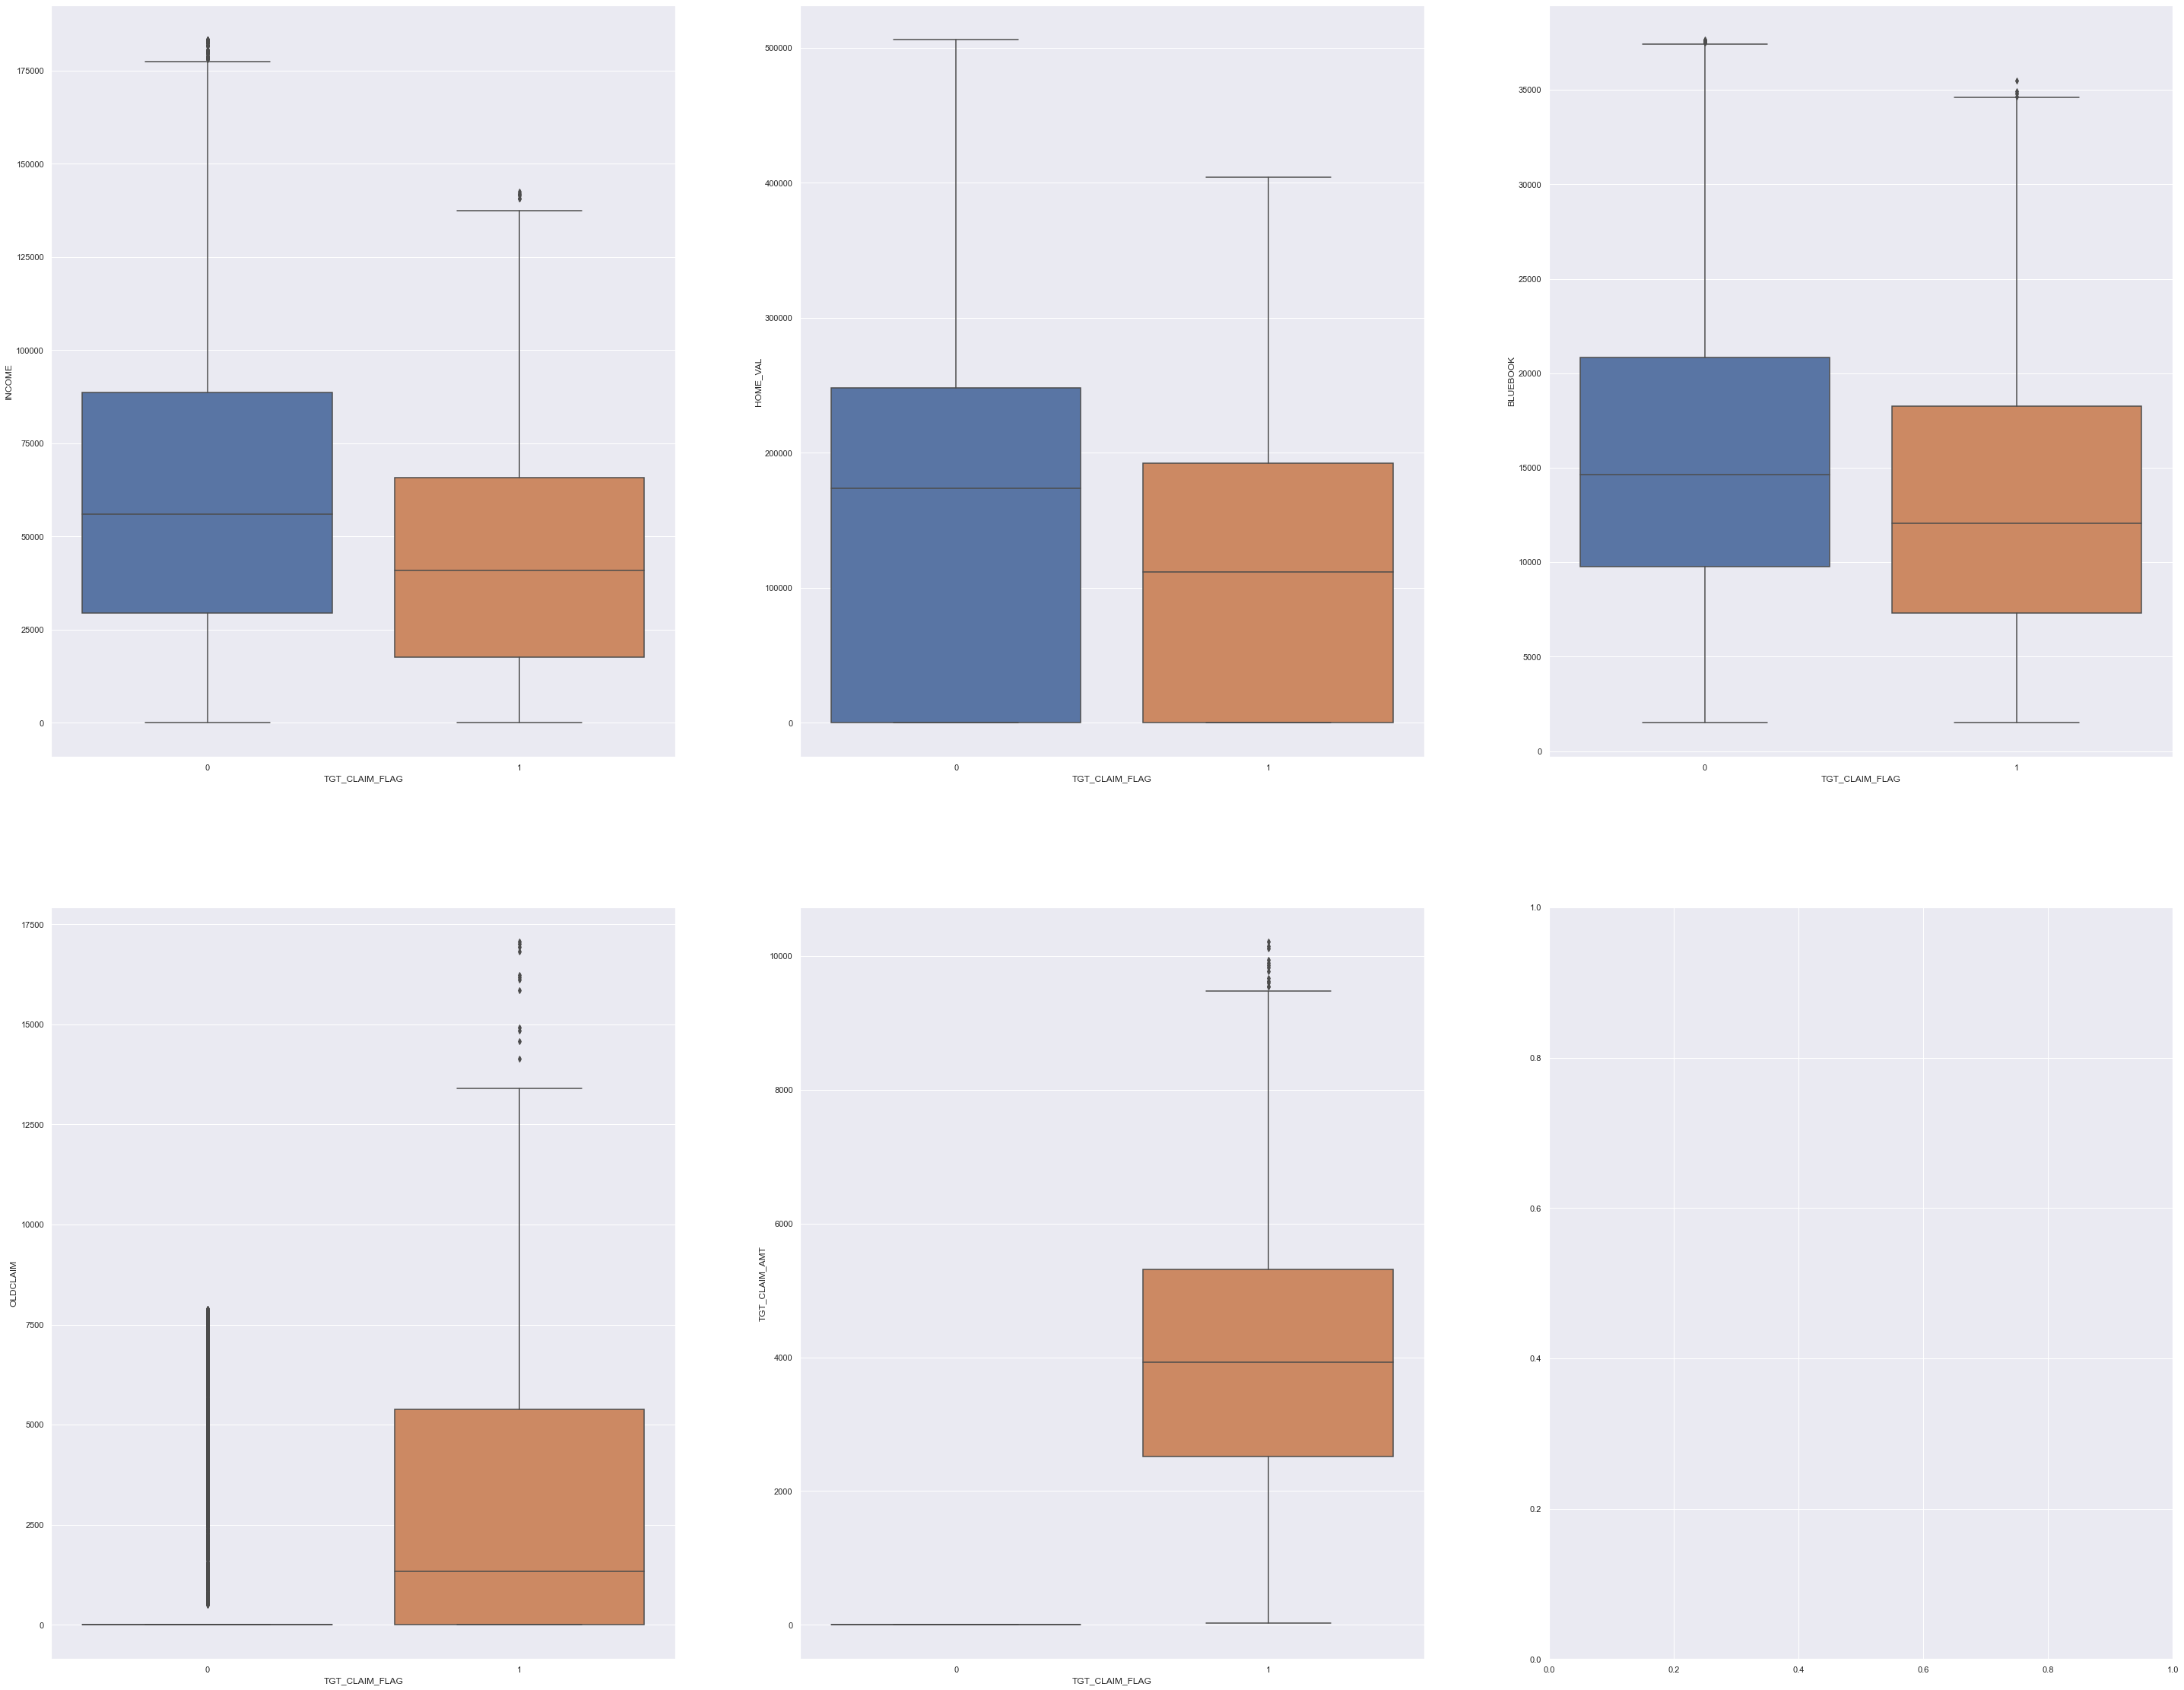

In [40]:
figure, axis = plt.subplots(2,3, figsize = (50,40))
sns.boxplot(y = 'INCOME', x = 'TGT_CLAIM_FLAG', data = df, ax = axis[0,0])
sns.boxplot(y = 'HOME_VAL', x = 'TGT_CLAIM_FLAG', data = df, ax = axis[0,1])
sns.boxplot(y = 'BLUEBOOK', x = 'TGT_CLAIM_FLAG', data = df, ax = axis[0,2])
sns.boxplot(y = 'OLDCLAIM', x = 'TGT_CLAIM_FLAG', data = df, ax = axis[1,0])
sns.boxplot(y = 'TGT_CLAIM_AMT', x = 'TGT_CLAIM_FLAG', data = df, ax = axis[1,1])

Note: As observed in the boxplot figure, its shows the improvement but still the outliers are not totally remove on the old claim. Next step, is to continue with removal of the outlier an decide to drop the colum with outlier that has no improvement. Later, I'll be dealing with the remaining outlier

### 1.5 Splittting the test data to select sample for a hold-out test
Now that I have clean data to work with, the next step is to choose a sample for the hold-out test set, which should contain an equal number of positive claims and negative claims, to ensure that there is enough test data for the claim amount problem in the second half.

Using stratified methods, we will choose a sample that is proportional to the population data. In the target claim amount, which we'll see later on the training data, this is done to prevent sampling errors.

The distribution of the test set is completely out of control and beyond the capabilities of the models because this will be (semi)randomly chosen once and for all. Additionally, this would stop any leaks from occurring later.

Stratified Hold Out
I've decided to perform a stratified split as a hold out for the test set.

Although I can stratify based on the 0s and 1s of TGT CLAIM FLAG, this may result in larger sampling errors for TGT CLAIM AMT.

Therefore, focusing on the TGT CLAIM AMT is the best course of action here.

To perform stratification on numerical targets/regression problems, manual folding may be required.

To stratify the numerical values, I should divide them into bins.

In [41]:
from sklearn.model_selection import StratifiedKFold

def make_stratified_k_folds(df,tgt_col:str,n_splits):
    # Randomise and reset index for splitting
    df = df.sample(frac=1,random_state=0).reset_index(drop=True)
    n_rows = df.shape[0]
    
    # Calculate k in Sturges Formula
    n_bins = int(np.floor(np.log2(n_rows) + 1))
    
    # Create bins
    df.loc[:,'bins'] = pd.cut(
        df[tgt_col], bins=n_bins, labels=False
    )
    
    skf = StratifiedKFold(n_splits=n_splits)
    for f, (t_, v_) in enumerate(skf.split(X=df, y=df['bins'].values)):
        df.loc[v_, 'kfold'] = f
        
    df = df.drop('bins',axis=1)
    return df



In [42]:
# Create hold-out test fold 
pre_df = make_stratified_k_folds(df,'TGT_CLAIM_AMT',8)
train_df = pre_df.copy().loc[pre_df['kfold'] != 0].drop('kfold', axis=1)
test_df = pre_df.copy().loc[pre_df['kfold'] == 0].drop('kfold', axis=1)

# 2. Exploratory Data Analysis (EDA)
Performing EDA using the training data set for basic exploration.

### 2.1 Basic Exploration

In [43]:
train_df.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,TGT_CLAIM_AMT,CAR_AGE,TGT_CLAIM_FLAG,URBANICITY
604,1,44.0,1,11.0,75161.0,Yes,241237.0,No,F,PhD,Doctor,48,Private,11220.0,1,SUV,no,6367.0,4,No,5,7833.0,19.0,1,Highly Urban/ Urban
684,0,44.0,0,12.0,22960.0,No,142579.0,Yes,M,High School,Blue Collar,21,Commercial,11690.0,4,Pickup,yes,0.0,0,No,1,1556.0,10.0,1,Highly Urban/ Urban
720,0,45.0,0,12.0,56828.0,No,201430.0,No,F,High School,Blue Collar,54,Commercial,14060.0,11,Sports Car,no,0.0,0,No,3,937.0,9.0,1,Highly Urban/ Urban
752,0,34.0,3,9.0,23439.0,No,113409.0,Yes,F,High School,Clerical,38,Private,7240.0,4,Minivan,no,0.0,0,Yes,1,7551.0,6.0,1,Highly Urban/ Urban
770,0,47.0,0,13.0,113356.0,No,380945.0,Yes,F,Masters,NaN,9,Commercial,16580.0,6,Pickup,no,0.0,0,No,0,1546.0,16.0,1,Highly Rural/ Rural


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6775 entries, 604 to 7742
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   KIDSDRIV        6775 non-null   int64  
 1   AGE             6771 non-null   float64
 2   HOMEKIDS        6775 non-null   int64  
 3   YOJ             6416 non-null   float64
 4   INCOME          6775 non-null   float64
 5   PARENT1         6775 non-null   object 
 6   HOME_VAL        6775 non-null   float64
 7   MSTATUS         6775 non-null   object 
 8   GENDER          6775 non-null   object 
 9   EDUCATION       6775 non-null   object 
 10  OCCUPATION      6423 non-null   object 
 11  TRAVTIME        6775 non-null   int64  
 12  CAR_USE         6775 non-null   object 
 13  BLUEBOOK        6775 non-null   float64
 14  TIF             6775 non-null   int64  
 15  CAR_TYPE        6775 non-null   object 
 16  RED_CAR         6775 non-null   object 
 17  OLDCLAIM        6775 non-null  

In [45]:
print(f"Dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns")
print(f"Duplicates: {train_df.duplicated().sum()}")
print(f"Total Missing Values: {train_df.isna().sum().sum()}")
print(f"Number of rows with missing values: {train_df.isna().any(axis=1).sum()}")

Dataset has 6775 rows and 25 columns
Duplicates: 0
Total Missing Values: 1142
Number of rows with missing values: 1076


### 2.2 Exploring Feature Distribution
Here, we will look at the distribution of each column and observe anomalies, if any.

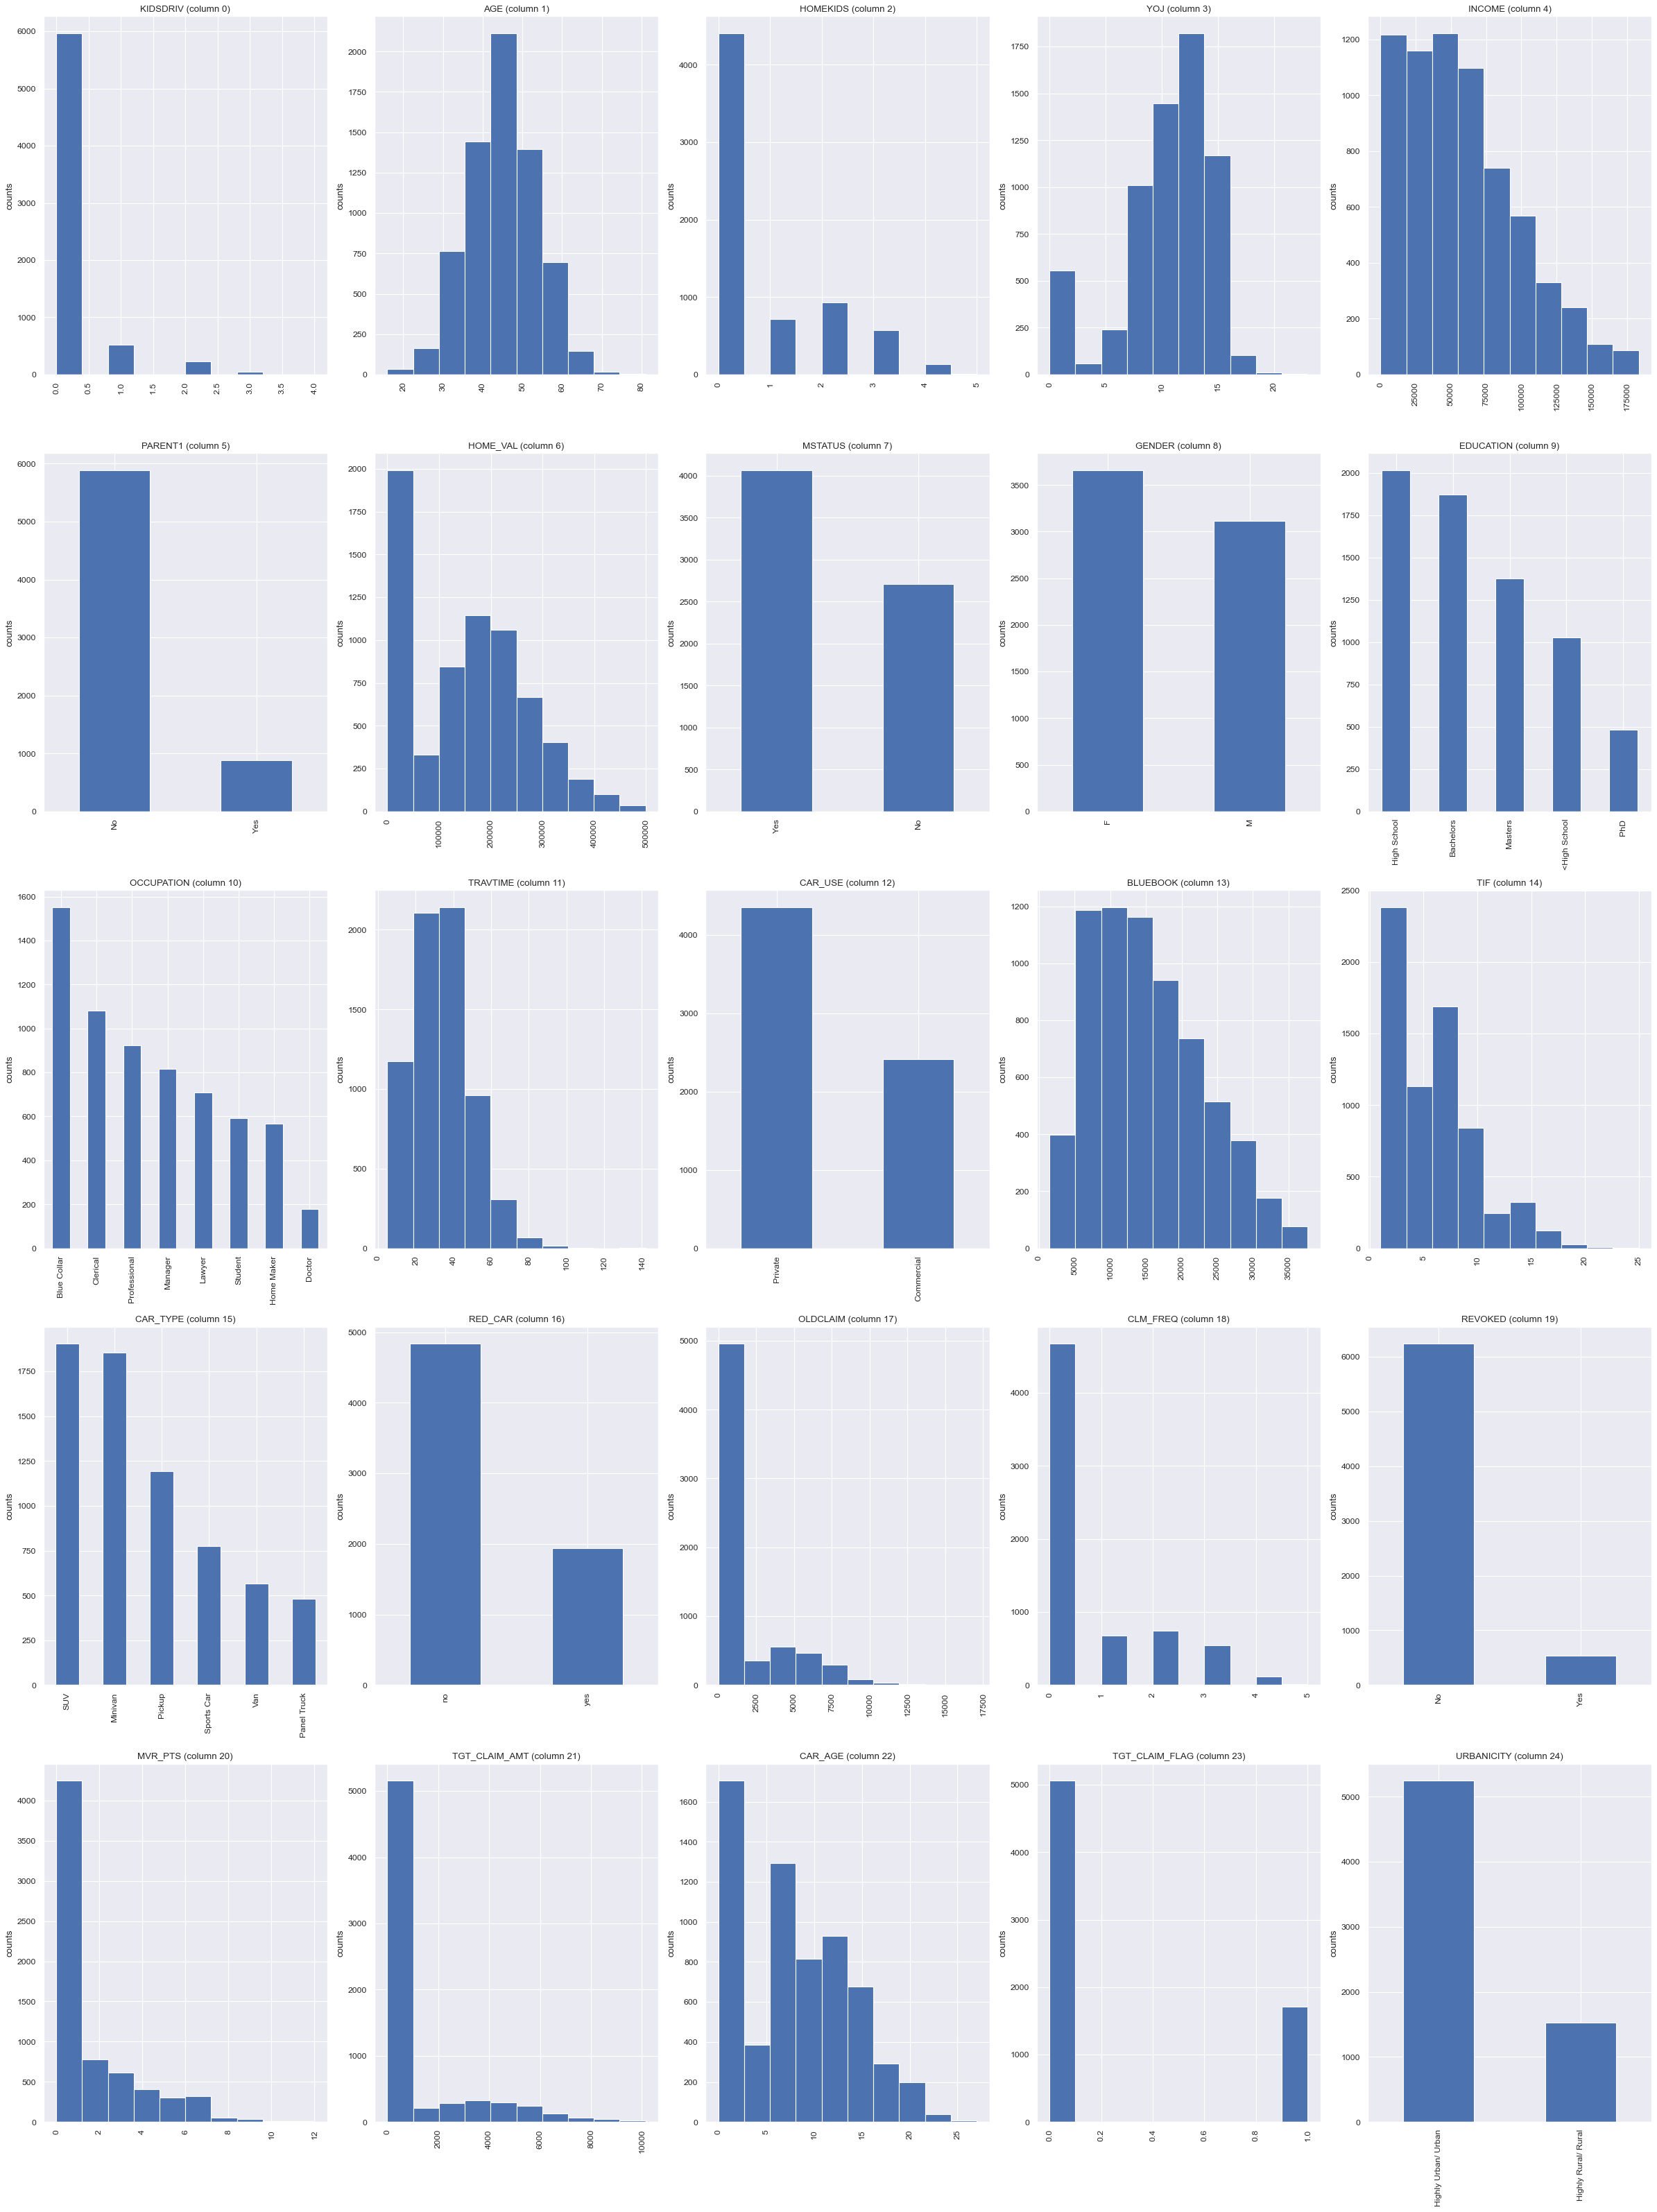

In [46]:
def plot_col_distribution(df, n_graph_per_row):
    n_col = df.shape[1]
    column_names = list(df)
    n_graph_row = (n_col + n_graph_per_row - 1) // n_graph_per_row
    plt.figure(num = None, figsize = (6 * n_graph_per_row, 8 * n_graph_row), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(n_col):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        column_df = df.iloc[:, i]
        if (not np.issubdtype(type(column_df.iloc[0]), np.number)):
            column_df.value_counts().plot.bar()
        else:
            column_df.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{column_names[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
plot_col_distribution(train_df,5)

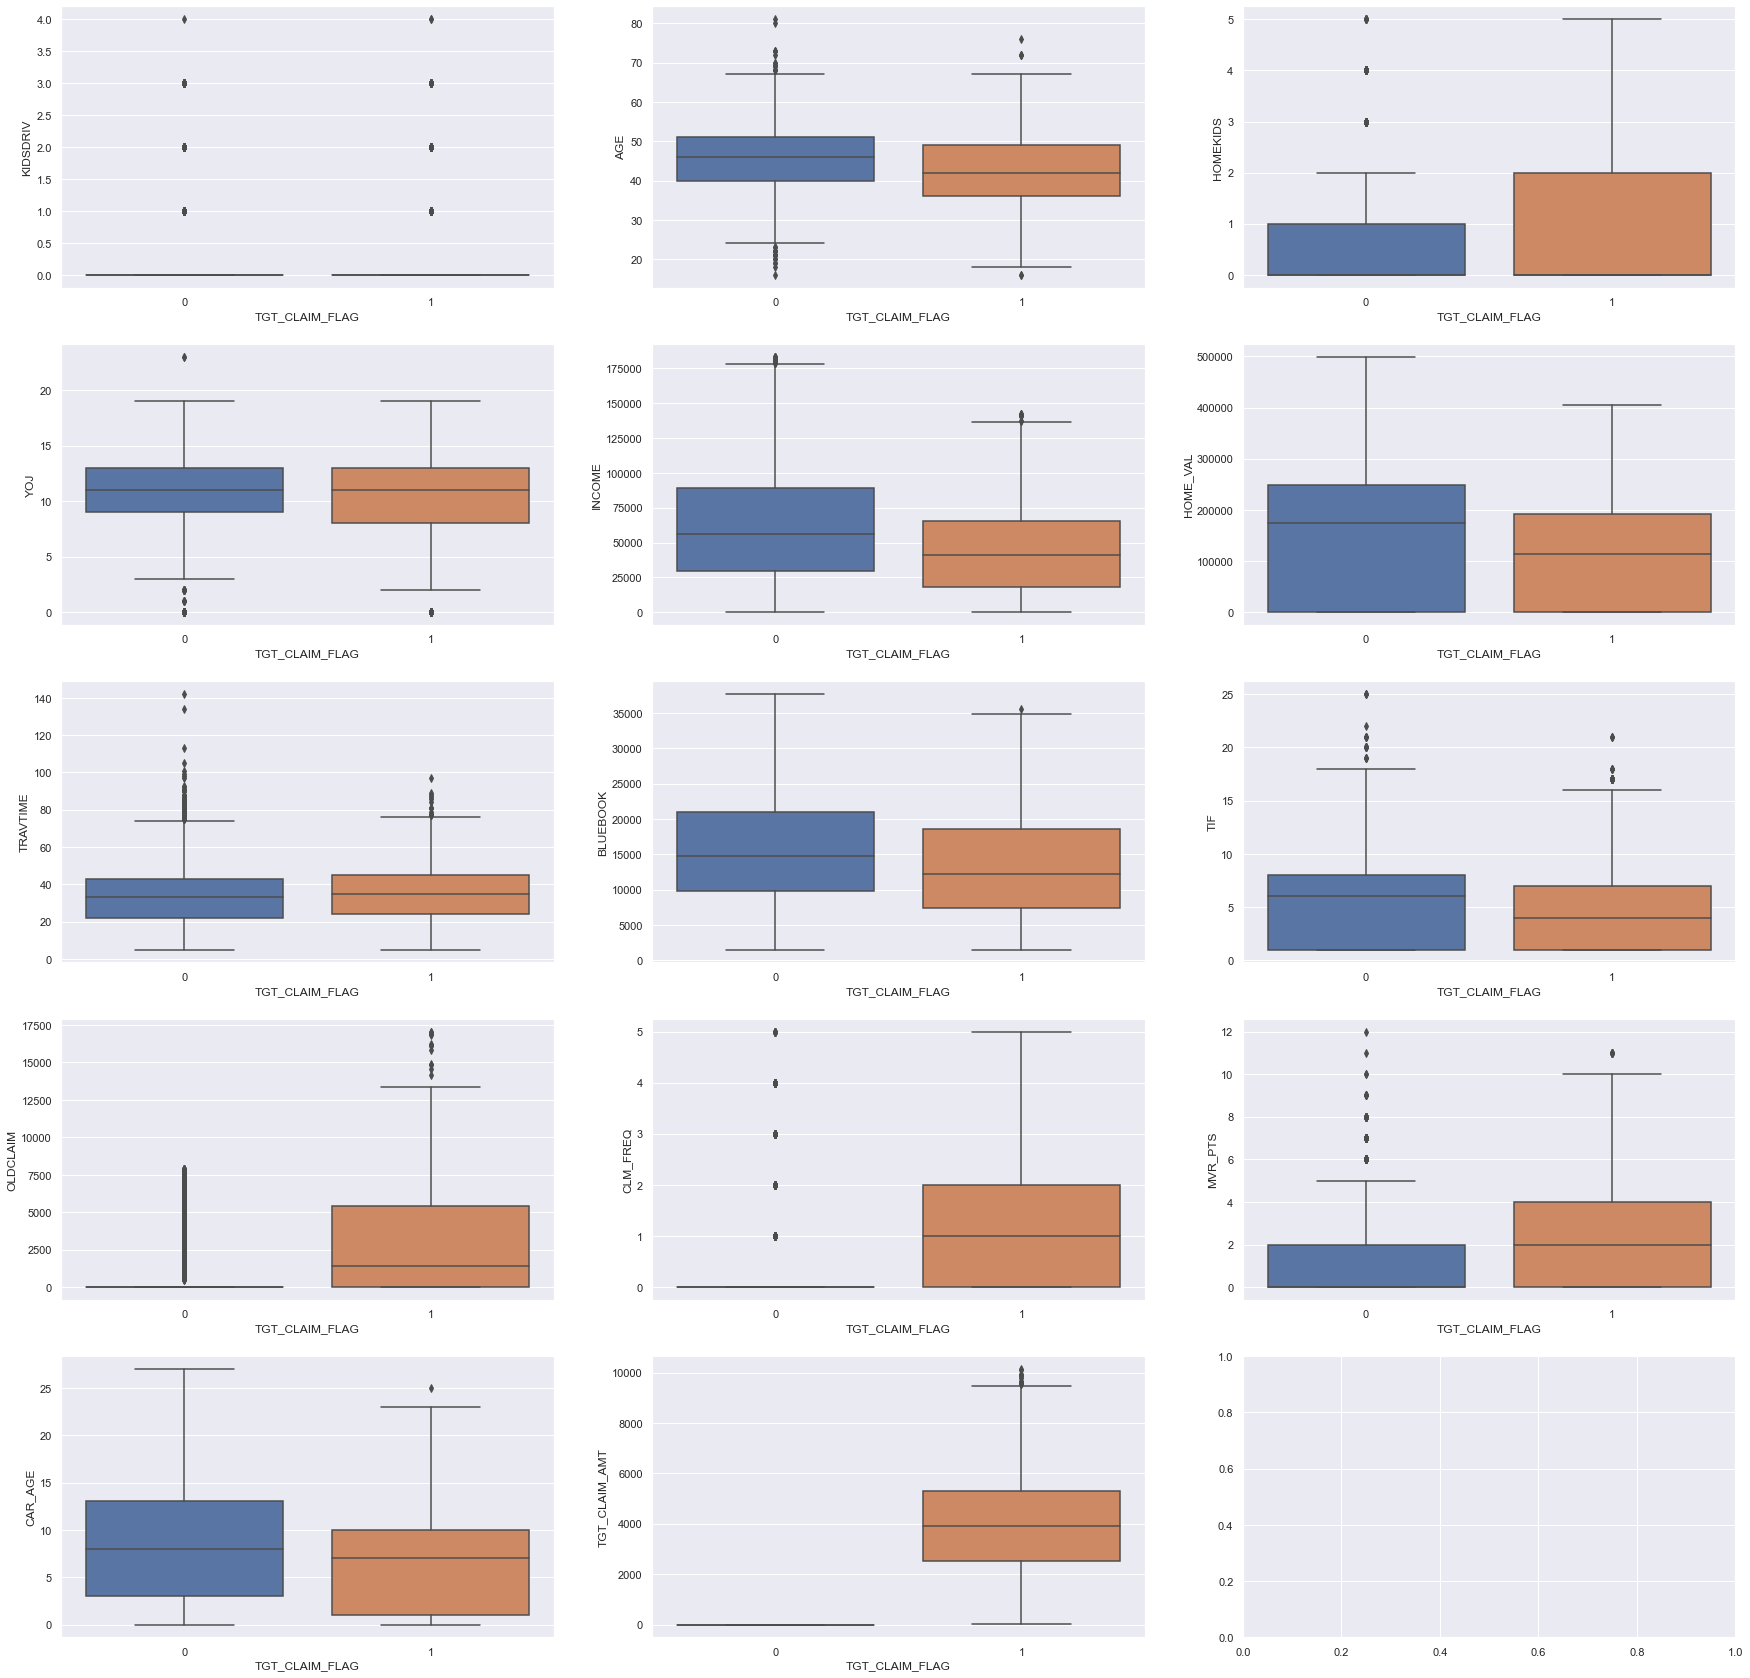

In [47]:
def plot_boxplot_by_claim_flag(df,cols,n_graph_per_row):
    sns.set_theme()
    n_rows, n_cols = 5,3
    figure, axis = plt.subplots(n_rows, n_cols, figsize = (30,30))
    i = 0
    for col in cols:
        j = i//n_cols
        k = i%n_cols
        sns.boxplot(y=col, x='TGT_CLAIM_FLAG', data=df, ax=axis[j,k])
        i +=1
        
all_num_cols = numerical_cols + ['TGT_CLAIM_AMT']
plot_boxplot_by_claim_flag(train_df,all_num_cols,5)

In [48]:
from scipy.stats import skew
for col in numerical_cols:
    print(f"{col} : {skew(train_df[col])}")
print(f"TGT_CLAIM_AMT : {skew(train_df['TGT_CLAIM_AMT'])}")

KIDSDRIV : 3.3604614013726164
AGE : nan
HOMEKIDS : 1.3339166469416346
YOJ : nan
INCOME : 0.6493657126398241
HOME_VAL : 0.20243804258617146
TRAVTIME : 0.46753288820208544
BLUEBOOK : 0.487205993113608
TIF : 0.8746313760275789
OLDCLAIM : 1.796190784141474
CLM_FREQ : 1.5379519284080385
MVR_PTS : 1.4933221288004255
CAR_AGE : nan
TGT_CLAIM_AMT : 1.9543473441657233


Note: Several of the numerical variables appear to be quite skewed. But despite the outliers, I'll make every effort to maintain the structure in order to make the most of it. The regression target's notable positive skew should also be noted.

### 2.3 Checking Correlation between Variables
Understanding how the variables are related, correlation will tell more about whether or not features are redundant. Redundant features can negatively impact the performance of the model.

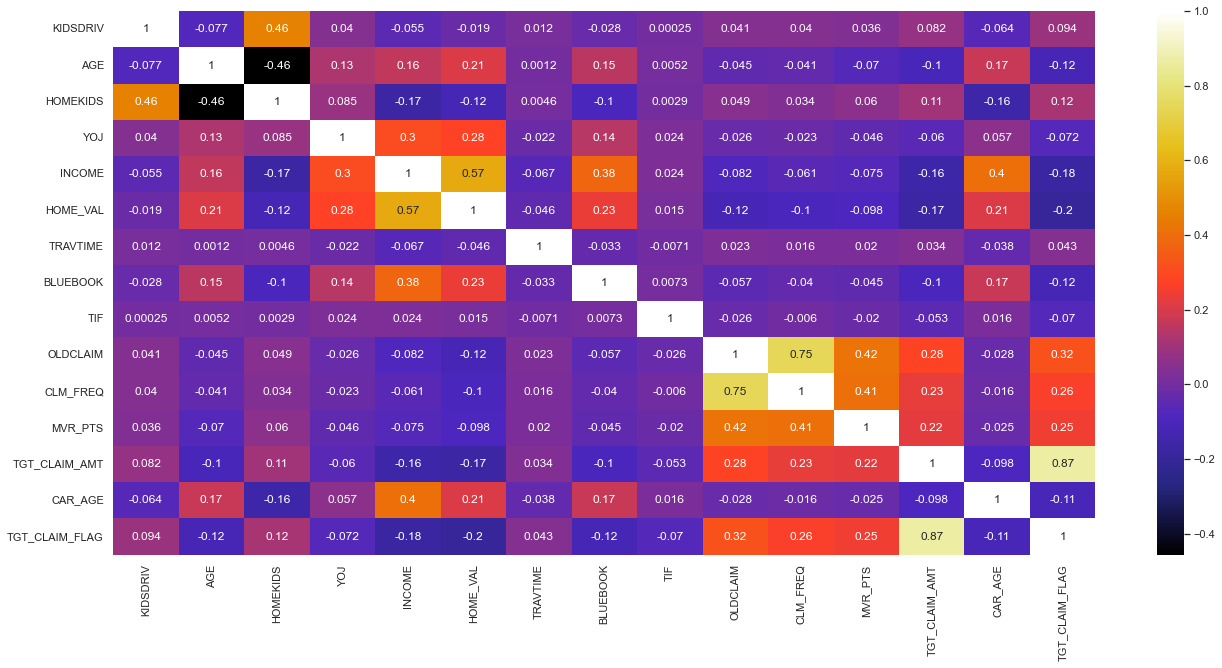

In [49]:
def plot_corr(df):
    corr = df.corr()
    sns.set_theme()
    plt.figure(figsize = (22,10))
    sns.heatmap(corr, cbar=True, annot=True, cmap='CMRmap')
plot_corr(train_df)

Note: The majority of features don't seem to be generally correlated, which is advantageous for use in the model later.

There is some correlation between "HOMEKIDS," "KIDSDRIVE," and "AGE." It makes sense that the likelihood of a child driving increases with the number of children living at home. Age is negatively correlated, which may indicate that only younger adults have children and that kids generally leave the nest at a younger age. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='AGE', ylabel='HOMEKIDS'>

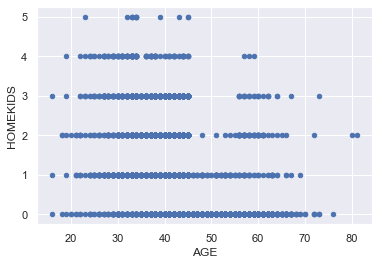

In [50]:
train_df.plot.scatter('AGE','HOMEKIDS')

Note: Another hotspot has the following values: "INCOME," "HOME VAL," "BLUEBOOK," "YOJ," and "CAR AGE." High earners typically invest their money in more expensive homes and cars. They also frequently have a longer tenure at their jobs.

They appear to have an affinity for vintage vehicles because they also drive older vehicles. 

Another cluster is "OLDCLAIM," "CLM FREQ," and "MVR PTS," where drivers with higher Motor Vehicle Record points are more likely to have been in collisions and have a history of claims.

### 2.4 Number of Categories in Each Categorical Feature¶
A feature loses its ability to be a categorical feature if it has too many categories.

In [51]:
for col in categorical_cols:
    print(col, 'has', df[col].nunique(),'unique variables')

PARENT1 has 2 unique variables
MSTATUS has 2 unique variables
GENDER has 2 unique variables
EDUCATION has 5 unique variables
OCCUPATION has 8 unique variables
CAR_USE has 2 unique variables
CAR_TYPE has 6 unique variables
RED_CAR has 2 unique variables
REVOKED has 2 unique variables
URBANICITY has 2 unique variables


Note: Fortunately, all categorical features have a reasonable number of categories.

Some can be categorised as binary, having only two states, since they have two distinct variables.

### 2.5 Check for Missing Values

In [52]:
print(f"Missing Values in DF: {train_df.isna().sum().sum()}")
print("\n")

def find_missing(df, cols:list):
    for i in cols:
        print(" - ", i, f", Missing: {df[i].isna().sum()}")
    print("\n")

print("Categorical features are:")
find_missing(train_df, categorical_cols)
print("Numerical features are:")
find_missing(train_df, numerical_cols)

print("Targets")
find_missing(train_df, ['TGT_CLAIM_FLAG'])

Missing Values in DF: 1142


Categorical features are:
 -  PARENT1 , Missing: 0
 -  MSTATUS , Missing: 0
 -  GENDER , Missing: 0
 -  EDUCATION , Missing: 0
 -  OCCUPATION , Missing: 352
 -  CAR_USE , Missing: 0
 -  CAR_TYPE , Missing: 0
 -  RED_CAR , Missing: 0
 -  REVOKED , Missing: 0
 -  URBANICITY , Missing: 0


Numerical features are:
 -  KIDSDRIV , Missing: 0
 -  AGE , Missing: 4
 -  HOMEKIDS , Missing: 0
 -  YOJ , Missing: 359
 -  INCOME , Missing: 0
 -  HOME_VAL , Missing: 0
 -  TRAVTIME , Missing: 0
 -  BLUEBOOK , Missing: 0
 -  TIF , Missing: 0
 -  OLDCLAIM , Missing: 0
 -  CLM_FREQ , Missing: 0
 -  MVR_PTS , Missing: 0
 -  CAR_AGE , Missing: 427


Targets
 -  TGT_CLAIM_FLAG , Missing: 0




Note: There are missing values in the Categorical features which is in the OCCUPATION feature and in the Numerical features
    whichare the Age, YOJ, INCOME,HOME_VAL and CAR_AGE. Later on , I can apply imputation for the mising value  in numerical and categorical values.

### 2.6 Selecting Model and Metrics

For the TGT CLAIM FLAG classification issue:
This is a problem of binary classification.

The F1-score, which is calculated as a "harmonic mean" of Precision and Recall, is a fantastic metric to use in such circumstances. Since the target has a high degree of skewness.

# 3. Cross Validation

I'll start by dividing the data here in order to train the models while using cross-validation. once more employ a stratified K-fold strategy. The samples in each fold will be recorded in a new column called kfold.
Instead of stratifying on 'TGT CLAIM FLAG' 

In [53]:
n_folds = 5
train_cv_df = make_stratified_k_folds(train_df,'TGT_CLAIM_AMT',n_folds)

In [54]:
train_cv_df.shape

(6775, 26)

In [55]:
train_cv_df.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'TGT_CLAIM_AMT', 'CAR_AGE', 'TGT_CLAIM_FLAG',
       'URBANICITY', 'kfold'],
      dtype='object')

# 4. Feature Engineering
Chosen to employ a tree-based algorithm because it can easily handle categorical variables. I still have to deal with missing values, though.

### 4.1 Imputing Missing Values in Numerical Variables
When possible, I'll use a KNN imputation for features with missing values since it "interpolates" data based on the information that is currently available. Since categorical values cannot be imputed using KNN, then use KNN on numerical features.

In [56]:
from sklearn.impute import KNNImputer, SimpleImputer

# Define imputers we'll be using
knn_imputer = KNNImputer(n_neighbors=2)

# Function to show a sample of the missing values that will be imputed
def missing_head(df,cols,n=5):
    df = df[cols]
    missing = df[df.isna().any(axis=1)].head(n)
    print('These are some samples with missing values')
    display(missing)
    print('\n')
    return missing.index.to_list()

In [57]:
# Some boiler plate code to impute and then sense check imputed values
def imputer_test(input_df, cols, imputer, test_samples):

    df = input_df[cols]
    df_imputed = pd.DataFrame(imputer.fit_transform(df))
    df_imputed.columns = df.columns
    print('The same samples with missing values imputed')
    display(df_imputed.loc[test_samples])
    
    imputed_missing_df = df_imputed[df_imputed.isna().any(axis=1)]
    print('Sense check for any empty values remaining')
    display(imputed_missing_df)
    print('The imputed df is empty:',imputed_missing_df.empty)
    print('\n')
    return df_imputed



In [58]:
# Find missing values and impute numerical columns
print('NUMERICAL FEATURES')
missing_num_samples = missing_head(train_cv_df, numerical_cols)
train_cv_df_num_imp = imputer_test(train_cv_df, numerical_cols, knn_imputer, missing_num_samples)

NUMERICAL FEATURES
These are some samples with missing values


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
0,0,38.0,3,16.0,16596.0,86339.0,47,7120.0,13,0.0,0,0,NaN
31,0,51.0,0,12.0,51628.0,206070.0,34,6940.0,4,0.0,0,0,NaN
32,0,39.0,0,12.0,40337.0,200448.0,14,6130.0,4,0.0,0,2,NaN
42,0,56.0,2,NaN,60286.0,213596.0,43,23480.0,10,0.0,0,0,11.0
47,0,53.0,0,NaN,147579.0,443598.0,50,16260.0,1,0.0,0,1,NaN




The same samples with missing values imputed


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
0,0.0,38.0,3.0,16.0,16596.0,86339.0,47.0,7120.0,13.0,0.0,0.0,0.0,9.5
31,0.0,51.0,0.0,12.0,51628.0,206070.0,34.0,6940.0,4.0,0.0,0.0,0.0,3.5
32,0.0,39.0,0.0,12.0,40337.0,200448.0,14.0,6130.0,4.0,0.0,0.0,2.0,6.5
42,0.0,56.0,2.0,12.5,60286.0,213596.0,43.0,23480.0,10.0,0.0,0.0,0.0,11.0
47,0.0,53.0,0.0,14.0,147579.0,443598.0,50.0,16260.0,1.0,0.0,0.0,1.0,16.5


Sense check for any empty values remaining


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE


The imputed df is empty: True




### 4.2 Imputing Missing Values in Categorical Variables
Reusing the previous code, I'll temporarily store missing categorical values in a new category called "MISSING."

In [59]:
# Define imputers we'll be using
categorical_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')

# Repeat for categorical columns, with the Simple 
print('CATEGORICAL FEATURES')
missing_categorical_samples = missing_head(train_cv_df, categorical_cols)
train_cv_df_categorical_imp = imputer_test(train_cv_df, categorical_cols, categorical_imputer, missing_categorical_samples)

CATEGORICAL FEATURES
These are some samples with missing values


,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
4,No,No,M,Masters,NaN,Commercial,Pickup,yes,No,Highly Urban/ Urban
15,No,No,M,Masters,NaN,Private,Minivan,no,No,Highly Urban/ Urban
29,Yes,No,M,Masters,NaN,Commercial,Panel Truck,yes,No,Highly Urban/ Urban
38,No,No,M,Masters,NaN,Commercial,Van,yes,No,Highly Urban/ Urban
57,No,Yes,M,Masters,NaN,Commercial,Panel Truck,yes,No,Highly Urban/ Urban




The same samples with missing values imputed


,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
4,No,No,M,Masters,MISSING,Commercial,Pickup,yes,No,Highly Urban/ Urban
15,No,No,M,Masters,MISSING,Private,Minivan,no,No,Highly Urban/ Urban
29,Yes,No,M,Masters,MISSING,Commercial,Panel Truck,yes,No,Highly Urban/ Urban
38,No,No,M,Masters,MISSING,Commercial,Van,yes,No,Highly Urban/ Urban
57,No,Yes,M,Masters,MISSING,Commercial,Panel Truck,yes,No,Highly Urban/ Urban


Sense check for any empty values remaining


,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY


The imputed df is empty: True




Note: I should rejoin the two variable types into one large df, just like before, since I imputed the two variable types separately.

In [60]:
# # Merge the two dataframes together
train_cv_df_imputed = pd.concat([train_cv_df_num_imp, train_cv_df_categorical_imp, train_cv_df[['TGT_CLAIM_FLAG','TGT_CLAIM_AMT','kfold']]], axis=1)
print(train_cv_df_imputed.shape)
train_cv_df_imputed.head()

(6775, 26)


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY,TGT_CLAIM_FLAG,TGT_CLAIM_AMT,kfold
0,0.0,38.0,3.0,16.0,16596.0,86339.0,47.0,7120.0,13.0,0.0,0.0,0.0,9.5,No,Yes,F,<High School,Clerical,Private,Sports Car,no,No,Highly Rural/ Rural,0,0.0,0.0
1,0.0,33.0,1.0,11.0,14277.0,109348.0,34.0,6230.0,6.0,1225.0,3.0,3.0,5.0,No,Yes,F,<High School,Professional,Private,SUV,no,No,Highly Urban/ Urban,0,0.0,0.0
2,0.0,38.0,0.0,10.0,34734.0,138910.0,38.0,8770.0,7.0,0.0,0.0,4.0,14.0,No,Yes,M,Bachelors,Clerical,Commercial,Pickup,yes,No,Highly Rural/ Rural,0,0.0,0.0
3,0.0,44.0,1.0,12.0,51120.0,0.0,36.0,26840.0,1.0,0.0,0.0,2.0,8.0,Yes,No,M,High School,Professional,Commercial,Panel Truck,yes,Yes,Highly Urban/ Urban,1,4373.0,0.0
4,0.0,37.0,0.0,13.0,82444.0,226818.0,5.0,9740.0,1.0,0.0,0.0,1.0,15.0,No,No,M,Masters,MISSING,Commercial,Pickup,yes,No,Highly Urban/ Urban,0,0.0,0.0


Note: The missing numerical and categorical values are imputed, next is to encoding the categorical values.

### 4.3 Encoding Categorical Variables
Looking at the nunique values from the Exploratory Data Analysis (EDA), and some analysis of each categorical value, there are 3 types of encoding we will perform here.

- Ordinal category: Only Education appears to have some linkage between the classes
- Binary categories: These categories have only two classes
- Nominal categories: There are multiple classes and they do not have any relationship with one another

In [61]:
# Define what to do with each categorical column
categorical_cols_ordinal = ['EDUCATION']
categorical_cols_binary = ['PARENT1','MSTATUS','GENDER','CAR_USE','RED_CAR','REVOKED','URBANICITY']
categorical_cols_nominal = ['CAR_TYPE', 'OCCUPATION']


In [62]:
# Set the order of 'EDUCATION' for the ordinal encoder
EDUCATION_ordinal = [['<High School','High School','Bachelors','Masters','PhD']]
EDUCATION_ordinal

[['<High School', 'High School', 'Bachelors', 'Masters', 'PhD']]

In [63]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler
# Define encoder
ordinal_encoder_EDUCATION = OrdinalEncoder(categories=EDUCATION_ordinal)
binary_encoder = OrdinalEncoder()
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [64]:
# Take only the categorical columns
train_cv_df_imputed_cat = train_cv_df_imputed[categorical_cols]
train_cv_df_imputed_cat

,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
0,No,Yes,F,<High School,Clerical,Private,Sports Car,no,No,Highly Rural/ Rural
1,No,Yes,F,<High School,Professional,Private,SUV,no,No,Highly Urban/ Urban
2,No,Yes,M,Bachelors,Clerical,Commercial,Pickup,yes,No,Highly Rural/ Rural
3,Yes,No,M,High School,Professional,Commercial,Panel Truck,yes,Yes,Highly Urban/ Urban
4,No,No,M,Masters,MISSING,Commercial,Pickup,yes,No,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...
6770,Yes,No,F,High School,Clerical,Private,Sports Car,no,No,Highly Rural/ Rural
6771,No,No,F,PhD,Home Maker,Private,Sports Car,no,No,Highly Urban/ Urban
6772,Yes,No,F,High School,Blue Collar,Commercial,Minivan,no,No,Highly Urban/ Urban
6773,Yes,No,F,<High School,Student,Private,SUV,no,No,Highly Urban/ Urban


In [65]:
# Encode each categorical type
## Ordinal categories
train_cv_df_categorical_enc_cat_ordinal = pd.DataFrame(ordinal_encoder_EDUCATION.fit_transform(train_cv_df_imputed_cat[categorical_cols_ordinal]))
train_cv_df_categorical_enc_cat_ordinal.columns = train_cv_df_imputed_cat[categorical_cols_ordinal].columns
train_cv_df_categorical_enc_cat_ordinal

,EDUCATION
0,0.0
1,0.0
2,2.0
3,1.0
4,3.0
...,...
6770,1.0
6771,4.0
6772,1.0
6773,0.0


In [66]:
## Binary categories
train_cv_df_imp_enc_categorical_binary = pd.DataFrame(binary_encoder.fit_transform(train_cv_df_imputed_cat[categorical_cols_binary]))
train_cv_df_imp_enc_categorical_binary.columns = train_cv_df_imputed_cat[categorical_cols_binary].columns
train_cv_df_imp_enc_categorical_binary

,PARENT1,MSTATUS,GENDER,CAR_USE,RED_CAR,REVOKED,URBANICITY
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
6770,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6771,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6772,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6773,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [67]:
## Nominal categories
train_cv_df_imp_enc_cat_nominal = pd.DataFrame(oh_encoder.fit_transform(train_cv_df_imputed_cat[categorical_cols_nominal]))
train_cv_df_imp_enc_cat_nominal.columns = oh_encoder.get_feature_names_out()
train_cv_df_imp_enc_cat_nominal

,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_MISSING,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6771,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6772,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6773,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
# merge the three sub-df's
train_cv_df_imp_enc_cat = pd.concat([train_cv_df_categorical_enc_cat_ordinal, train_cv_df_imp_enc_categorical_binary, train_cv_df_imp_enc_cat_nominal], axis=1)
train_cv_df_imp_enc_cat.head()
train_cv_df_imp_enc_cat

,EDUCATION,PARENT1,MSTATUS,GENDER,CAR_USE,RED_CAR,REVOKED,URBANICITY,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_MISSING,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6771,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6772,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6773,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
# Merge the targets and kfold indexes from the Cros Validation df
train_cv_df_imp_enc = pd.concat([train_cv_df_imputed[numerical_cols], train_cv_df_imp_enc_cat, train_cv_df[['TGT_CLAIM_FLAG','TGT_CLAIM_AMT','kfold']]], axis=1)
train_cv_df_imp_enc.head()
train_cv_df_imp_enc

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE,EDUCATION,PARENT1,MSTATUS,GENDER,CAR_USE,RED_CAR,REVOKED,URBANICITY,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_MISSING,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,TGT_CLAIM_FLAG,TGT_CLAIM_AMT,kfold
0,0.0,38.0,3.0,16.0,16596.0,86339.0,47.0,7120.0,13.0,0.0,0.0,0.0,9.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,0.0,33.0,1.0,11.0,14277.0,109348.0,34.0,6230.0,6.0,1225.0,3.0,3.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0
2,0.0,38.0,0.0,10.0,34734.0,138910.0,38.0,8770.0,7.0,0.0,0.0,4.0,14.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0.0,44.0,1.0,12.0,51120.0,0.0,36.0,26840.0,1.0,0.0,0.0,2.0,8.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4373.0,0.0
4,0.0,37.0,0.0,13.0,82444.0,226818.0,5.0,9740.0,1.0,0.0,0.0,1.0,15.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,0.0,29.0,3.0,10.0,53643.0,0.0,54.0,10080.0,7.0,5910.0,2.0,7.0,11.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,4.0
6771,0.0,36.0,0.0,0.0,0.0,68436.0,62.0,2680.0,6.0,0.0,0.0,0.0,21.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,4402.0,4.0
6772,0.0,29.0,2.0,11.0,47621.0,196036.0,26.0,17130.0,9.0,5584.0,3.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,4.0
6773,0.0,37.0,1.0,12.0,5678.0,0.0,42.0,2070.0,1.0,6535.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3327.0,4.0


In [70]:
train_cv_df_imp_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KIDSDRIV                 6775 non-null   float64
 1   AGE                      6775 non-null   float64
 2   HOMEKIDS                 6775 non-null   float64
 3   YOJ                      6775 non-null   float64
 4   INCOME                   6775 non-null   float64
 5   HOME_VAL                 6775 non-null   float64
 6   TRAVTIME                 6775 non-null   float64
 7   BLUEBOOK                 6775 non-null   float64
 8   TIF                      6775 non-null   float64
 9   OLDCLAIM                 6775 non-null   float64
 10  CLM_FREQ                 6775 non-null   float64
 11  MVR_PTS                  6775 non-null   float64
 12  CAR_AGE                  6775 non-null   float64
 13  EDUCATION                6775 non-null   float64
 14  PARENT1                 

Note: Now, there are no missing values and data type has ben converted to numerical. The data is now clean and ready for model selection.
    But before that, I need to evaluate the one-hot encoded variables for Multicollinearity issue.

### 4.4 Checking for multicollinearity
Looking to one-hot encoded variables to avoid  problems with Multicollinearity. Evaluate how doing so reduces multicollinearity.
 
Checking for multicollinearity is the Variance Inflation Factor (VIF):

- VIF = 1 : Very little Multicollinearity
- VIF < 5 : Moderate Multicollinearity
- VIF > 5 : Extreme Multicollinearity (This is what we have to avoid)

In [71]:
def calc_vif(df):
    df_cols = df.columns
    vif_values = [
        variance_inflation_factor(df.values, i) for i in range(len(df_cols))
        ]
    return pd.DataFrame(zip(df_cols, vif_values),columns=['Variable','VIF'])

calc_vif(train_cv_df_imp_enc.drop(['TGT_CLAIM_FLAG','TGT_CLAIM_AMT','kfold'], axis=1))

C:\Users\Vengie Dinampo\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,KIDSDRIV,1.311130
1,AGE,1.480411
2,HOMEKIDS,2.102144
3,YOJ,1.467125
4,INCOME,3.059462
5,HOME_VAL,2.416044
6,TRAVTIME,1.040660
7,BLUEBOOK,1.910197
8,TIF,1.005576
9,OLDCLAIM,2.383528


Note: As observed, the one-hot encoded variables displayed infinite VIF, which means that need to drop variable with 'inf' one of each of the newly encoded features.

In [72]:
# Drop one of each of the "dummy variables"
train_cv_df_imp_enc_ = train_cv_df_imp_enc.drop(['CAR_TYPE_Minivan','OCCUPATION_Blue Collar'], axis=1)

# Re-Calculate VIF 
calc_vif(train_cv_df_imp_enc_.drop(['TGT_CLAIM_FLAG','TGT_CLAIM_AMT','kfold'], axis=1))

,Variable,VIF
0,KIDSDRIV,1.442171
1,AGE,27.057901
2,HOMEKIDS,2.823494
3,YOJ,10.458421
4,INCOME,8.859642
5,HOME_VAL,6.190314
6,TRAVTIME,5.280482
7,BLUEBOOK,8.558008
8,TIF,2.671238
9,OLDCLAIM,3.142193


Note: As observed that CAR_TYPE and OCCUPATION are no longer infinite in their VIF. This confirms that always drop a column when doing one-hot encoding.

Now all our missing values are imputed, and all categorical variables have been encoded.

In [73]:
base_df = train_cv_df_imp_enc_.copy()
base_df.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE,EDUCATION,PARENT1,MSTATUS,GENDER,CAR_USE,RED_CAR,REVOKED,URBANICITY,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_MISSING,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,TGT_CLAIM_FLAG,TGT_CLAIM_AMT,kfold
0,0.0,38.0,3.0,16.0,16596.0,86339.0,47.0,7120.0,13.0,0.0,0.0,0.0,9.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,0.0,33.0,1.0,11.0,14277.0,109348.0,34.0,6230.0,6.0,1225.0,3.0,3.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0
2,0.0,38.0,0.0,10.0,34734.0,138910.0,38.0,8770.0,7.0,0.0,0.0,4.0,14.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0.0,44.0,1.0,12.0,51120.0,0.0,36.0,26840.0,1.0,0.0,0.0,2.0,8.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4373.0,0.0
4,0.0,37.0,0.0,13.0,82444.0,226818.0,5.0,9740.0,1.0,0.0,0.0,1.0,15.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0


In [74]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KIDSDRIV                 6775 non-null   float64
 1   AGE                      6775 non-null   float64
 2   HOMEKIDS                 6775 non-null   float64
 3   YOJ                      6775 non-null   float64
 4   INCOME                   6775 non-null   float64
 5   HOME_VAL                 6775 non-null   float64
 6   TRAVTIME                 6775 non-null   float64
 7   BLUEBOOK                 6775 non-null   float64
 8   TIF                      6775 non-null   float64
 9   OLDCLAIM                 6775 non-null   float64
 10  CLM_FREQ                 6775 non-null   float64
 11  MVR_PTS                  6775 non-null   float64
 12  CAR_AGE                  6775 non-null   float64
 13  EDUCATION                6775 non-null   float64
 14  PARENT1                 

Note: Columns are now without null valus and the data type has been converted as well. Now, it's ready for train and test.

## 4.5 Train Test Split


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = base_df.drop('TGT_CLAIM_FLAG', axis=1)
y = base_df['TGT_CLAIM_FLAG']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 5. Model Building 
Selection a list of popular classifiers to compare with selected metric. I'll choose 5 popular classifiers.

### 5.1 Logistic Regression 

In [77]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


model_logistic = LogisticRegression(solver='sag', max_iter=1000, tol=5)
model_logistic.fit(X_train, y_train)
model_logistic

LogisticRegression(max_iter=1000, solver='sag', tol=5)

In [78]:
y_predicted_Logistic = model_logistic.predict(X_test)
logistic_score = model_logistic.score(X_test,y_test)
logistic_score

0.7768595041322314

### 5.2 KNearest Neighbors

In [79]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train, y_train)
KNN_model

KNeighborsClassifier(n_neighbors=3)

In [80]:
y_predicted_KNN = KNN_model.predict(X_test) 
KNN_score = KNN_model.score(X_test,y_test)
KNN_score

0.8707201889020071

### 5.3 Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

randomforest_model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
randomforest_model.fit(X_test, y_test)
randomforest_model

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [82]:
y_predicted_randomforest = randomforest_model.predict(X_test)
RF_score = randomforest_model.score(X_test,y_test)
RF_score

1.0

### 5.4 XGBoost

In [83]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor

xgboost_model= XGBClassifier(random_state=0)
xgboost_model.fit(X_test, y_test)
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [84]:
y_predicted_xgb = xgboost_model.predict(X_test)
XGB_score = xgboost_model.score(X_test,y_test)
XGB_score

1.0

### 5.5 Gradient Boosting Classifier

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model= GradientBoostingClassifier(random_state=0)
gbc_model.fit(X_test, y_test)
gbc_model

GradientBoostingClassifier(random_state=0)

In [86]:
y_predicted_gbc = gbc_model.predict(X_test)
GBC_score = gbc_model.score(X_test,y_test)
GBC_score

1.0

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score


Model_Names = ['Logistic Regression', 'KNearest Neighbor', 'Random Forest','XGBoost', 'Gradient Boosting']
Scores = [logistic_score, KNN_score, RF_score, XGB_score,GBC_score]
Precision = [precision_score(y_test, y_predicted_Logistic),precision_score(y_test, y_predicted_KNN), precision_score(y_test, y_predicted_randomforest), precision_score(y_test, y_predicted_xgb), precision_score(y_test, y_predicted_gbc)]
Recall = [recall_score(y_test, y_predicted_Logistic), recall_score(y_test, y_predicted_KNN), recall_score(y_test, y_predicted_randomforest), recall_score(y_test, y_predicted_xgb), recall_score(y_test, y_predicted_gbc)]
# F1 = [2*(Precision*Recall)/(Precision+Recall)]
F1 = [f1_score(y_test,y_predicted_Logistic),f1_score(y_test,y_predicted_KNN),f1_score(y_test,y_predicted_randomforest),f1_score(y_test,y_predicted_xgb),f1_score(y_test,y_predicted_gbc)] 

In [88]:
report_DF = pd.DataFrame()

report_DF['Model Classifiers'] = Model_Names
report_DF['Accuracy'] = Scores
report_DF['Precision'] = Precision
report_DF['Recall'] = Recall
report_DF['F1'] = F1

In [89]:
sns.set_theme()
CM = sns.color_palette("light:b", as_cmap=True)
report_DF.style.background_gradient(cmap=CM)

,Model Classifiers,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.776860,0.976190,0.098086,0.178261
1,KNearest Neighbor,0.870720,0.902834,0.533493,0.670677
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,XGBoost,1.000000,1.000000,1.000000,1.000000
4,Gradient Boosting,1.000000,1.000000,1.000000,1.000000


Note: According to technique metric result analysis, there are three model clasifiers that are performing well, random forest model is the best performance accross the metric with 100% precison, recall and accuracy.
This means that the model is somehow "balanced", that is, its ability to correctly classify positive samples is same as its ability to correctly classify negative samples. However, the importance of sensitivity and specificity may vary from case to case, so being "balanced" is not necessarily good. So, next I'll do the cross vlidation and evaluate.

The performance evaluation metrics of a classification-based machine learning model, displays the 'Gradient Boosting Classifier' with model’s precision, recall, F1 score and support. It provides a better understanding of the overall performance of the trained model.

* Precision: Out of all the vehicle insurance claims that the model predicted 100% correctly classifed
* Recall: Out of all the vehicle insurance claims that actually did get classified, the model  predicted this outcome correctly for 100%.
* f1-score: The model does a great job of predicting whether or not is claim is fraudelent or not.


### 5.6 Evaluation of classifiers with KFolds

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#evaluation - baselines
num_folds = 10

scoring = 'accuracy'
models = []
models.append(('Logistic Regression', LogisticRegression(solver='sag', max_iter=1000, tol=5)))
models.append(('KNearest Neighbor', KNeighborsClassifier(n_neighbors = 3)))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 10, criterion = 'entropy')))
models.append(('XGBoost', XGBClassifier(random_state=0)))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=0)))


results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f " % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression 0.772675 0.019122 
KNearest Neighbor 0.865182 0.014514 
Random Forest 0.999016 0.001321 
XGBoost 0.999803 0.000591 
Gradient Boosting 0.999803 0.000591 


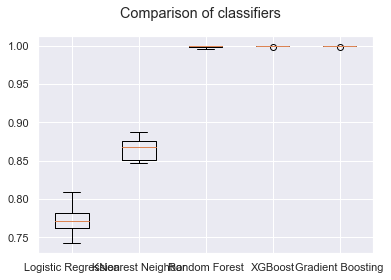

In [91]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Note: It seems the result from the previus evaluation are the same with KFold. I'll do another test to drop the 'TGT_CLAIM_AMT' in the.

In [92]:
base_df2 = train_cv_df_imp_enc_.copy()

# 6. Model Selection (With Pipeline)
Building pipeline with KFolds using the popular classifiers to compare with selected metric.

### 6.1 Building a reusable pipeline to compare with other model

In [93]:
from sklearn.metrics import f1_score

# Model selection
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=0, solver='sag', max_iter=1000, tol=5)),
    ('Nearest Neighbors', KNeighborsClassifier(3)),
    ('Random Forest', RandomForestClassifier(random_state=0, max_depth=5, n_estimators=10, max_features=1)),
    ('XGBoost', XGBClassifier(random_state=0)),
    ('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=0))
]

In [94]:
def train_test_split_by_fold(base_df2, fold, tgt):
    X = base_df2.drop(['TGT_CLAIM_FLAG','TGT_CLAIM_AMT'], axis=1)
    y = base_df2[tgt]

    X_train = X.loc[X['kfold'] != fold].drop('kfold',axis=1)
    X_valid = X.loc[X['kfold'] == fold].drop('kfold',axis=1)
    y_train = y.loc[X['kfold'] != fold]
    y_valid = y.loc[X['kfold'] == fold]
    return X_train, X_valid, y_train, y_valid

In [95]:
X_train, X_valid,y_train, y_valid = train_test_split_by_fold(base_df,0,'TGT_CLAIM_FLAG')
performance = []
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    perf_tuple = (name, f1_score(y_valid, y_pred, average='weighted'))
    print(perf_tuple)
    performance.append(perf_tuple)

('Logistic Regression', 0.6397002674648995)
('Nearest Neighbors', 0.6957133899912332)
('Random Forest', 0.6386097608206377)
('XGBoost', 0.7831255751202861)
('Gradient Boosting Classifier', 0.7939430691549405)


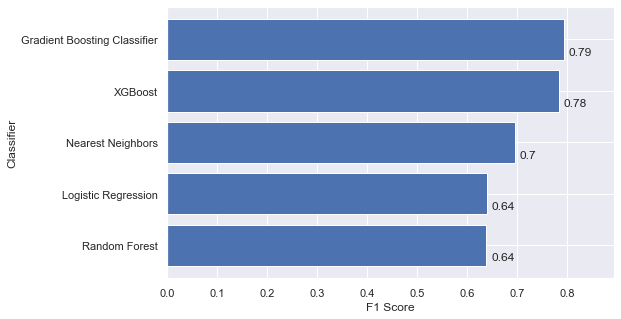

In [96]:
x, y = list(zip(*sorted(performance, key=lambda x: x[1], reverse=False)))
plt.figure(figsize=(8,5))
plt.barh(x,y)
plt.xlim(right=max(y)+0.1)
plt.xlabel('F1 Score')
plt.ylabel('Classifier')
for i in range(len(y)):
    plt.text(y[i]+0.01,i-0.3,round(y[i],2))
plt.show()

Note: From the above result, It's clearly that the Gradiet Boosting Classifier perfomed well, followed by XGBoost classifier performed respectively.  So, Gradient Boosting Classifier with random_state=0 result is good and next model is the XGBoost. So, from above performance result, I'll select the Gradiet Boosting Classifier to fit and try to optimise as possible.


In [97]:
final_df = base_df.copy()

# 7. Fitting the Model
Creating pipeline to manage all the imputing, encoding, selection. The pipeline ensures that whatever done on the training set, it can also apply on the test set.

In [98]:

# Redefine the imputers/encoders for the pipeline
knn_imputer = KNNImputer(n_neighbors=2)
cat_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')
ordinal_encoder_EDUCATION = OrdinalEncoder(categories=EDUCATION_ordinal)
binary_encoder = OrdinalEncoder()
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first') 


print(knn_imputer)
print(cat_imputer)
print(ordinal_encoder_EDUCATION)
print(binary_encoder)
print(oh_encoder)

KNNImputer(n_neighbors=2)
SimpleImputer(fill_value='MISSING', strategy='constant')
OrdinalEncoder(categories=[['<High School', 'High School', 'Bachelors',
                            'Masters', 'PhD']])
OrdinalEncoder()
OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)


In [99]:
from sklearn.pipeline import Pipeline

# Define transformers for numerical and categorical
numerical_transformer = knn_imputer

#categorical_ordinal_transformer
categorical_ord_transformer = Pipeline(steps=[
    ('cat_imputer', cat_imputer),
    ('ord', ordinal_encoder_EDUCATION),
])
numerical_transformer

KNNImputer(n_neighbors=2)

In [100]:
#categorical binarytransformer
categorical_bin_transformer = Pipeline(steps=[
    ('cat_imputer', cat_imputer),
    ('bin', binary_encoder),
])
categorical_bin_transformer

Pipeline(steps=[('cat_imputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('bin', OrdinalEncoder())])

In [101]:
#categorical ohe hot encoding transformer
categorical_ohe_transformer = Pipeline(steps=[
    ('cat_imputer', cat_imputer),
    ('nom', oh_encoder),
])
categorical_ohe_transformer

Pipeline(steps=[('cat_imputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('nom',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse=False))])

In [102]:
from sklearn.compose import ColumnTransformer
# setting the above transformers into a ColumnTransformer class
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat_ord', categorical_ord_transformer, categorical_cols_ordinal),
        ('cat_bin', categorical_bin_transformer, categorical_cols_binary),
        ('cat_ohe', categorical_ohe_transformer, categorical_cols_nominal)
    ])
preprocessor

ColumnTransformer(transformers=[('num', KNNImputer(n_neighbors=2),
                                 ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ',
                                  'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK',
                                  'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS',
                                  'CAR_AGE']),
                                ('cat_ord',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['<High '
                                                                              'School',
                                                                              'High '
                                                                              'S...
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('bin', OrdinalEncoder())]),
                                 ['PARENT1', 'MSTATUS', 'GENDER', 'CAR_USE',
                                  'RED_CAR', 'REVOKED', 'URBANICITY']),
                                ('cat_ohe',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('nom',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CAR_TYPE', 'OCCUPATION'])])

In [103]:
# Define pipeline steps
base_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])
base_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  KNNImputer(n_neighbors=2),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ', 'INCOME',
                                                   'HOME_VAL', 'TRAVTIME',
                                                   'BLUEBOOK', 'TIF',
                                                   'OLDCLAIM', 'CLM_FREQ',
                                                   'MVR_PTS', 'CAR_AGE']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categ...
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('bin',
                                                                   OrdinalEncoder())]),
                                                  ['PARENT1', 'MSTATUS',
                                                   'GENDER', 'CAR_USE',
                                                   'RED_CAR', 'REVOKED',
                                                   'URBANICITY']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('nom',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['CAR_TYPE',
                                                   'OCCUPATION'])]))])

In [104]:
processed_df_tmp = pd.DataFrame(base_pipeline.fit_transform(train_cv_df.drop(['TGT_CLAIM_FLAG','TGT_CLAIM_AMT','kfold'], axis=1)))

categorical_cols_nom_new = list(base_pipeline.named_steps['preprocessor'].transformers_[3][1].named_steps['nom'].get_feature_names_out(categorical_cols_nominal))
new_cols = numerical_cols + categorical_cols_ordinal + categorical_cols_binary + categorical_cols_nom_new

processed_df_tmp.columns = new_cols

processed_df = pd.concat([processed_df_tmp,
    train_cv_df[['TGT_CLAIM_FLAG','TGT_CLAIM_AMT','kfold']]], axis=1)

# Validate the pipeline against the manual transforms:
print('The pipeline output is the same as the manual transform:',processed_df.equals(final_df))

The pipeline output is the same as the manual transform: True


In [105]:
# Instantiate the classifier with default parameters
xgb_clf = XGBClassifier(random_state=0)

def run_fold(df, fold, tgt, model):
    X_train, X_valid, y_train, y_valid = train_test_split_by_fold(df, fold, tgt)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    f1 = f1_score(y_valid, y_pred, average='weighted')
    print('F1 score:',f1)
    return f1

run_fold(processed_df, 0,'TGT_CLAIM_FLAG', xgb_clf)

F1 score: 0.7831255751202861


0.7831255751202861

In [106]:
def run_all_folds(df, tgt, model):
    f1_scores = []
    for fold_ in range(n_folds):
        print('Fold:',fold_ + 1, 'of', n_folds)
        f1_scores.append(run_fold(df, fold_, tgt, model))
        print('\n -----------------------------------')
    print('Average F1 Score:', np.mean(f1_scores))
    
run_all_folds(processed_df, 'TGT_CLAIM_FLAG', xgb_clf)

Fold: 1 of 5
F1 score: 0.7831255751202861

 -----------------------------------
Fold: 2 of 5
F1 score: 0.7928971186756673

 -----------------------------------
Fold: 3 of 5
F1 score: 0.7792008882873005

 -----------------------------------
Fold: 4 of 5
F1 score: 0.7907023116622919

 -----------------------------------
Fold: 5 of 5
F1 score: 0.8034258267186989

 -----------------------------------
Average F1 Score: 0.789870344092849


# 9. Model Optimisation
Finding out the default parameters to tune to build a space of  hyperparameters to test.

In [107]:
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [108]:
# Based on the defaults above, and whatever is in the documentation for XGBoost, let's define our hyperparameter test space
space = {
    'learning_rate': hp.uniform ('learning_rate', 0.05,0.5),
    'max_depth': hp.choice('max_depth', np.arange(3, 18, dtype=int)),
    'eval_metric': hp.choice('eval_metric',[None,'error']),
    'gamma': hp.uniform ('gamma', 0,9),
    'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
    'reg_lambda' : hp.uniform('reg_lambda', 0,10),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
    'min_child_weight' : hp.quniform('min_child_weight', 0, 50, 1),
    'n_estimators': scope.int(hp.quniform('n_estimators',50,200,5))
}
space

{'learning_rate': <hyperopt.pyll.base.Apply at 0x19ed2be5fd0>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x19ed2be5880>,
 'eval_metric': <hyperopt.pyll.base.Apply at 0x19ed2be5640>,
 'gamma': <hyperopt.pyll.base.Apply at 0x19ed2be5550>,
 'reg_alpha': <hyperopt.pyll.base.Apply at 0x19ed2be5430>,
 'reg_lambda': <hyperopt.pyll.base.Apply at 0x19ed2be52e0>,
 'colsample_bytree': <hyperopt.pyll.base.Apply at 0x19ed2be5190>,
 'min_child_weight': <hyperopt.pyll.base.Apply at 0x19ed2be56a0>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x19ee7138e80>}

Note: Based on the model used and the train/validation splits, the objective function produces a loss.
After that, the loss from the objective function is minimised by Hyperopt's fmin.

In [109]:
# Define the objective loss function to be minimised 
def objective(params):
    xgb_clf = XGBClassifier(random_state=0, **params)
    f1_scores = []
    for fold_ in range(n_folds):
        X_train, X_valid, y_train, y_valid = train_test_split_by_fold(processed_df, fold_, 'TGT_CLAIM_FLAG')

        evaluation = [(X_train, y_train), (X_valid, y_valid)]
        xgb_clf.fit(X_train, y_train,
                eval_set=evaluation,
                verbose=False)
        y_pred = xgb_clf.predict(X_valid)
        f1_scores.append(f1_score(y_valid, y_pred, average='weighted'))
    avg_f1 = np.mean(f1_scores)
#     print ("F1 Score:", avg_f1)
    return {'loss': -avg_f1, 'status': STATUS_OK }

trials = Trials()
best_hyperparams = fmin(fn=objective,
                        space=space,
                        algo=tpe.suggest,
                        max_evals=100,
                        trials=trials)

100%|█████████████████████████████████████████████| 100/100 [04:18<00:00,  2.58s/trial, best loss: -0.7985440544307185]


In [110]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8022683434674679, 'eval_metric': 1, 'gamma': 1.1011249629472109, 'learning_rate': 0.23271470931479973, 'max_depth': 11, 'min_child_weight': 28.0, 'n_estimators': 140.0, 'reg_alpha': 18.0, 'reg_lambda': 8.915493920976626}


In [111]:
best_hyperparams['n_estimators'] = int(best_hyperparams['n_estimators'])
best_hyperparams['eval_metric'] = [None,'error'][best_hyperparams['eval_metric']]

# Instantiate the classifier 
xgb_clf_best = XGBClassifier(random_state=0, **best_hyperparams)

run_all_folds(processed_df, 'TGT_CLAIM_FLAG', xgb_clf_best)

Fold: 1 of 5
F1 score: 0.7914004537571877

 -----------------------------------
Fold: 2 of 5
F1 score: 0.7848773663004704

 -----------------------------------
Fold: 3 of 5
F1 score: 0.8083895988412203

 -----------------------------------
Fold: 4 of 5
F1 score: 0.8036600674064807

 -----------------------------------
Fold: 5 of 5
F1 score: 0.8043927858482331

 -----------------------------------
Average F1 Score: 0.7985440544307185


Note: As observed that their is slight  improvement on the model average performance after tuning.

# 10. Testing model by Predicting the Test Data
I'll use the  most raw, unaltered data, which we divided into the train df and the test df, to show how the pipeline works in full.

The target variables will be separated out of the two datasets.

In [132]:
# Add the best model to a pipeline with the base transformations
xgb_pipeline = Pipeline(steps=[
    ('base',base_pipeline),
    ('model',xgb_clf_best)
])

In [133]:
X_train = train_df.drop(['TGT_CLAIM_FLAG'], axis=1)
y_train = train_df['TGT_CLAIM_FLAG']
X_test = test_df.drop(['TGT_CLAIM_FLAG'], axis=1)
y_test = test_df['TGT_CLAIM_FLAG']

xgb_pipeline.fit(X_train,y_train)



Pipeline(steps=[('base',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   KNNImputer(n_neighbors=2),
                                                                   ['KIDSDRIV',
                                                                    'AGE',
                                                                    'HOMEKIDS',
                                                                    'YOJ',
                                                                    'INCOME',
                                                                    'HOME_VAL',
                                                                    'TRAVTIME',
                                                                    'BLUEBOOK',
                                                                    'TIF',
                                                                    'OLDCLAIM',
                                                                    'CLM_FREQ',
                                                                    'MVR_PTS',
                                                                    'CAR_AGE']),
                                                                  ('cat_ord',
                                                                   Pipeline(steps=[('cat_imputer',
                                                                                    SimpleImputer(fill_value='MISSING',
                                                                                                  strategy='constant')),
                                                                                   ('o...
                               gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.23271470931479973, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=11, max_leaves=0,
                               min_child_weight=28.0, missing=nan,
                               monotone_constraints='()', n_estimators=140,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [134]:
y_pred = xgb_pipeline.predict(test_df)
print('F1 Score on training data:',f1_score(y_test, y_pred, average='weighted'))

F1 Score on training data: 0.809841032597659


In [142]:
x_test = final_df.drop(columns=['TGT_CLAIM_FLAG'])
y_test = final_df['TGT_CLAIM_FLAG']


xgb_clf_best = XGBClassifier(random_state=0,**best_hyperparams)
xgb_clf_best.fit(x_test, y_test)
final_df['PREDICTION'] = xgb_clf_best.predict(x_test)
final_df

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE,EDUCATION,PARENT1,MSTATUS,GENDER,CAR_USE,RED_CAR,REVOKED,URBANICITY,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_MISSING,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,TGT_CLAIM_FLAG,TGT_CLAIM_AMT,kfold,Prediction,PREDICTION
0,0.0,38.0,3.0,16.0,16596.0,86339.0,47.0,7120.0,13.0,0.0,0.0,0.0,9.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
1,0.0,33.0,1.0,11.0,14277.0,109348.0,34.0,6230.0,6.0,1225.0,3.0,3.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0
2,0.0,38.0,0.0,10.0,34734.0,138910.0,38.0,8770.0,7.0,0.0,0.0,4.0,14.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
3,0.0,44.0,1.0,12.0,51120.0,0.0,36.0,26840.0,1.0,0.0,0.0,2.0,8.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4373.0,0.0,1,1
4,0.0,37.0,0.0,13.0,82444.0,226818.0,5.0,9740.0,1.0,0.0,0.0,1.0,15.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,0.0,29.0,3.0,10.0,53643.0,0.0,54.0,10080.0,7.0,5910.0,2.0,7.0,11.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,4.0,0,0
6771,0.0,36.0,0.0,0.0,0.0,68436.0,62.0,2680.0,6.0,0.0,0.0,0.0,21.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,4402.0,4.0,1,1
6772,0.0,29.0,2.0,11.0,47621.0,196036.0,26.0,17130.0,9.0,5584.0,3.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,4.0,0,0
6773,0.0,37.0,1.0,12.0,5678.0,0.0,42.0,2070.0,1.0,6535.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3327.0,4.0,1,1


Overall, the model that has best performance is the 'Gradient Boosting Classifier' model. I’ve run the KFold however the result has no significant changes comparison to the running the simple model but with the model optimisation there is slight improvement of the performance which is really good.
I didn’t use PCA technique as the dataset has low number of features and running a simple model is faster. Removing any features will not help to the model.
The result in model test with test data is slightly higher which indicated that testing data is not bad relatively to result achieve in the training set.
